# Exploratory Data Analysis & Data Cleaning :  


---



---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive




# Read Data

In [ ]:

drive.mount('/content/drive')

data=pd.read_csv("/content/drive/MyDrive/Portfolio/Credit Score Classification (Classification)/Data/train.csv")


Mounted at /content/drive


<ipython-input-2-b628f9820446>:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/Portfolio/Credit Score Classification (Classification)/train.csv")


In [ ]:
data.head(4)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good


## print columns


In [ ]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# ✅ Convert the data to the approperiate type !


In [ ]:

# define functions that converts numerical type features and string type features into the appropriate type

# C_History_Age column will be handled seperatly


def convert_to_numeric(columns_to_num,data):


  # Replace invalid characters and convert to float
  for col in columns_to_num:
     # Replace non-numeric characters with NaN
      data[col] = data[col].replace(r'[^\d.]+', np.nan, regex=True)
      # Handle empty strings
      data[col] = data[col].replace('', np.nan)
      # Convert the column to float
      data[col] = data[col].astype(float).round(2)

def convert_to_str(columns_to_str,data):


  # Replace invalid characters and convert to str
  for col in columns_to_str:

      # Convert the column to str
      data[col] = data[col].astype(str)

  return data





In [ ]:
columns_to_num= ['Num_Credit_Inquiries','Annual_Income', 'Monthly_Inhand_Salary','Changed_Credit_Limit' ,'Outstanding_Debt',
                  'Credit_Utilization_Ratio','Total_EMI_per_month','Monthly_Balance','Amount_invested_monthly',
                  'Age','Num_Credit_Inquiries','Delay_from_due_date', 'Num_of_Delayed_Payment' , 'Num_Bank_Accounts',
                  'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan']


data_converted=convert_to_numeric(columns_to_num,data)

columns_to_str=['ID', 'Customer_ID', 'Month', 'Name',  'SSN', 'Occupation',
                'Type_of_Loan', 'Credit_Mix','Payment_of_Min_Amount',
                'Payment_Behaviour','Credit_Score']


data_converted=convert_to_str(columns_to_str,data)

data_converted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       94175 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               91339 non-null   float64
 13  Type_of_Loan              100000 non-null  ob

# ⭐ Univariate analysis and feature engineering

In [ ]:
data_converted.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
# Define functions to explore Categorical Variables

def get_categorical_distributions(data,
                                  categorical_columns=['ID', 'Customer_ID', 'Month', 'Name',  'SSN', 'Occupation',
                                                        'Type_of_Loan', 'Credit_Mix','Payment_of_Min_Amount',
                                                        'Payment_Behaviour','Credit_Score']

                                ):

    categorical_data = {}

    for column in categorical_columns:
        categorical_data[column] = data[column].value_counts()




    return categorical_data

def print_distributions(categorical_data):
    for column, column_counts in categorical_data.items():
        print(f"------ {column} ------")
        print("\n Data:")
        print(column_counts)


def plot_categorical_distribution(data,column):
    # Get unique categories from both datasets
    all_categories = set(data[column].unique())
    # Generate a consistent palette for these categories
    palette = dict(zip(all_categories, sns.color_palette('husl', len(all_categories))))

    plt.figure(figsize=(20, 6))


    sns.countplot(x=column, data=data, order=all_categories, palette=palette)
    plt.title(f'{column} Distribution ')





## **1.ID** :

In [ ]:
data_converted ['ID']

0         0x1602
1         0x1603
2         0x1604
3         0x1605
4         0x1606
          ...   
99995    0x25fe9
99996    0x25fea
99997    0x25feb
99998    0x25fec
99999    0x25fed
Name: ID, Length: 100000, dtype: object

In [ ]:
# Check for Missing Values
m_v_ID=data_converted ['ID'].isnull().sum()
print(f'Number of Missing valus in "ID"  : {m_v_ID }')

Number of Missing valus in "ID"  : 0


## **2.Customer_ID** :

In [ ]:
data_converted['Customer_ID']

0         CUS_0xd40
1         CUS_0xd40
2         CUS_0xd40
3         CUS_0xd40
4         CUS_0xd40
            ...    
99995    CUS_0x942c
99996    CUS_0x942c
99997    CUS_0x942c
99998    CUS_0x942c
99999    CUS_0x942c
Name: Customer_ID, Length: 100000, dtype: object

In [ ]:

# Check for Missing Values
m_v_customer_ID=data_converted ['ID'].isnull().sum()
print(f'Number of Missing valus in "Customer_ID"  : {m_v_customer_ID }')

Number of Missing valus in "Customer_ID"  : 0


In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Customer_ID'])


print_distributions(categorical_dist)

------ Customer_ID ------

 Data:
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64


Note : The ID column will be used as a the unique key refrence for the customers


In [ ]:
# Number of unique customers
uc=len(categorical_dist['Customer_ID'] )
print(f'Number of unique customers : {uc }')

Number of unique customers : 12500


## **3.Month** :

In [ ]:
# Check for Missing Values
m_v_Month=data_converted ['Month'].isnull().sum()
print(f'Number of Missing valus in "Month"  : {m_v_Month }')

Number of Missing valus in "Month"  : 0


In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Month'])
print_distributions(categorical_dist)

------ Month ------

 Data:
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64


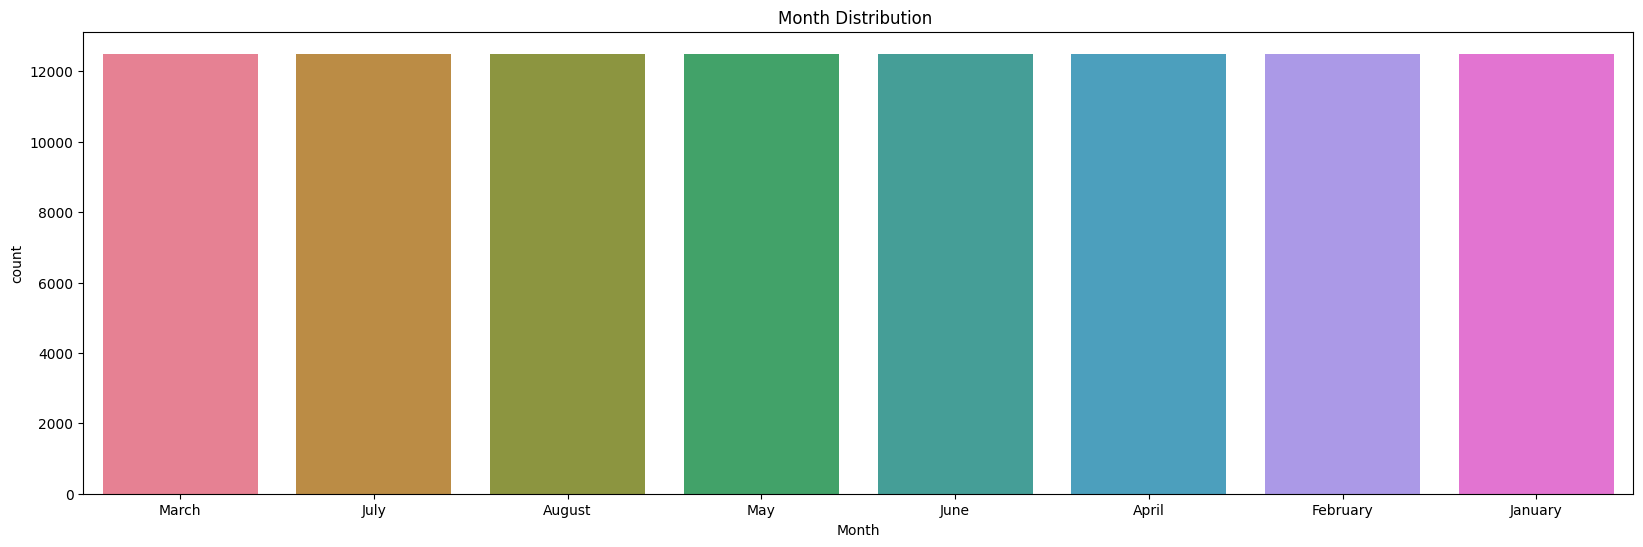

In [ ]:
# plot Months destribution :
plot_categorical_distribution(data_converted,'Month')

In [ ]:
data_converted['Month']

0         January
1        February
2           March
3           April
4             May
           ...   
99995       April
99996         May
99997        June
99998        July
99999      August
Name: Month, Length: 100000, dtype: object

## **4.Name** :

In [ ]:
# Check for Missing Values
m_v_Name=data_converted ['Name'].isna().sum()
print(f'Number of Missing valus in "Month"  : {m_v_Name }')

Number of Missing valus in "Month"  : 0


In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Name'])
print_distributions(categorical_dist)

------ Name ------

 Data:
nan               9985
Stevex              44
Langep              44
Jessicad            39
Vaughanl            39
                  ... 
Robin Pomeroyz       4
Matt Scuffhamk       4
Julieno              4
Bavierq              4
Timothyl             3
Name: Name, Length: 10140, dtype: int64


***Note : The nan category should be replaced with NA's and investigated***

In [ ]:
data_converted["Name"] = data_converted["Name"].replace("nan", None)

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Name'])
print_distributions(categorical_dist)

------ Name ------

 Data:
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64


In [ ]:
data_converted['Name'].isna().sum()

9985

In [ ]:
np.unique(data_converted.Customer_ID)

array(['CUS_0x1000', 'CUS_0x1009', 'CUS_0x100b', ..., 'CUS_0xff6',
       'CUS_0xffc', 'CUS_0xffd'], dtype=object)

In [ ]:
# Before
data_converted[data_converted['Customer_ID'] == 'CUS_0x1000']['Name']

56752    Alistair Barrf
56753              None
56754    Alistair Barrf
56755    Alistair Barrf
56756    Alistair Barrf
56757    Alistair Barrf
56758    Alistair Barrf
56759    Alistair Barrf
Name: Name, dtype: object

In [ ]:

# A function that replaces the NA's with the relevenat value based on customer ID similarity
def fill_missing_NA(df, column, column_ref, flag=1):
    # Handle categorical data
    if flag == 1:
        # Create a dictionary to map customer_id to name
        ref_dict = df.dropna(subset=[column]).set_index(column_ref)[column].to_dict()

        # Apply the mapping to fill missing values
        df[column] = df.apply(
            lambda row: ref_dict.get(row[column_ref], row[column]) if pd.isna(row[column]) else row[column],
            axis=1
        )

    # Handle numerical data
    elif flag == 0:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # Get unique values from the reference column
            uniques = np.unique(df[column_ref])

            # Calculate mean for each unique value in the reference column
            for i in uniques:
                mean =int( df[df[column_ref] == i][column].mean())
                # Fill missing values with the mean for that group
                df.loc[df[column_ref] == i, column] = df[df[column_ref] == i][column].fillna(mean)
        else:
            print(f"The column '{column}' is not numeric and cannot be processed for numerical data.")

    return df


data_converted=fill_missing_NA(data_converted,'Name','Customer_ID')

print(f"Numer of Missing Values in the column Name after filling Na's : {data_converted['Name'].isna().sum()}")

Numer of Missing Values in the column Name after filling Na's : 0


In [ ]:
# After
data_converted[data_converted['Customer_ID'] == 'CUS_0x1000']['Name']

56752    Alistair Barrf
56753    Alistair Barrf
56754    Alistair Barrf
56755    Alistair Barrf
56756    Alistair Barrf
56757    Alistair Barrf
56758    Alistair Barrf
56759    Alistair Barrf
Name: Name, dtype: object

## **5.Age** :

In [ ]:
# Check for missing values
data_converted['Age'].isna().sum()

5825

In [ ]:
# Before
data_converted[data_converted['Customer_ID'] == 'CUS_0x1000']['Age']

56752    17.0
56753    17.0
56754     NaN
56755    17.0
56756    17.0
56757    18.0
56758    18.0
56759    18.0
Name: Age, dtype: float64

In [ ]:
data_converted=fill_missing_NA(data_converted,'Age','Customer_ID',flag=0)

In [ ]:
#After
data_converted[data_converted['Customer_ID'] == 'CUS_0x1000']['Age']

56752    17.0
56753    17.0
56754    17.0
56755    17.0
56756    17.0
56757    18.0
56758    18.0
56759    18.0
Name: Age, dtype: float64

In [ ]:
data_converted['Age'].isna().sum()

0

In [ ]:
data_converted['Age'].describe()

count    100000.000000
mean        116.644940
std         672.767834
min          14.000000
25%          25.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

In [ ]:
data_converted.sort_values(by='Age', ascending=False)['Age'].head(10)

71732    8698.0
82739    8697.0
35557    8682.0
82335    8678.0
13372    8674.0
71542    8666.0
36575    8663.0
11190    8662.0
6005     8655.0
94475    8643.0
Name: Age, dtype: float64

In [ ]:

#Replace the extreme values with an upper bound
threshold = 75
limit_value = 75

# Replace values above the threshold with the limit value
data_converted['Age'] = data_converted['Age'].where(data_converted['Age'] <= threshold, limit_value)


In [ ]:
data_converted['Age'].describe()

count    100000.000000
mean         34.351300
std          12.467677
min          14.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          75.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age Distribution with Density')

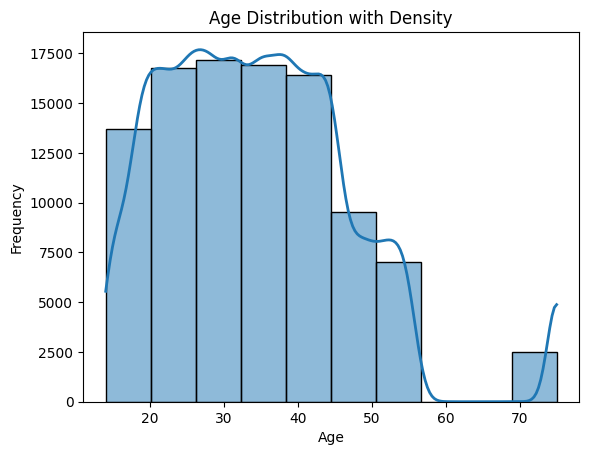

In [ ]:
# Plot distribution of Age

sns.histplot(data['Age'], kde=True, bins=10, line_kws={'linewidth': 2})


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution with Density')


## **6.SSN** :

In [ ]:
# Check for Missing Values
m_v_SSN=data_converted ['SSN'].isna().sum()
print(f'Number of Missing valus in "SSN"  : {m_v_SSN }')

Number of Missing valus in "SSN"  : 0


In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['SSN'])
print_distributions(categorical_dist)

------ SSN ------

 Data:
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64


In [ ]:
data_converted["SSN"] = data_converted["SSN"].replace("#F%$D@*&8", None)

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['SSN'])
print_distributions(categorical_dist)

------ SSN ------

 Data:
078-73-5990    8
439-76-5364    8
750-67-7525    8
903-50-0305    8
376-28-6303    8
              ..
856-06-6147    4
753-72-2651    4
331-28-1921    4
604-62-6133    4
286-44-9634    4
Name: SSN, Length: 12500, dtype: int64


In [ ]:
data_converted['SSN'].isna().sum()

5572

In [ ]:
np.unique(data_converted.Customer_ID)[0:10]

array(['CUS_0x1000', 'CUS_0x1009', 'CUS_0x100b', 'CUS_0x1011',
       'CUS_0x1013', 'CUS_0x1015', 'CUS_0x1018', 'CUS_0x1026',
       'CUS_0x102d', 'CUS_0x102e'], dtype=object)

In [ ]:
# Before
data_converted[data_converted['Customer_ID'] == 'CUS_0x100b']['SSN']

1528    238-62-0395
1529    238-62-0395
1530    238-62-0395
1531    238-62-0395
1532    238-62-0395
1533    238-62-0395
1534    238-62-0395
1535           None
Name: SSN, dtype: object

In [ ]:

data_converted=fill_missing_NA(data_converted,'SSN','Customer_ID')

print(f"Numer of Missing Values in the column Name after filling Na's : {data_converted['Name'].isna().sum()}")

Numer of Missing Values in the column Name after filling Na's : 0


In [ ]:
# After
data_converted[data_converted['Customer_ID'] == 'CUS_0x100b']['SSN']

1528    238-62-0395
1529    238-62-0395
1530    238-62-0395
1531    238-62-0395
1532    238-62-0395
1533    238-62-0395
1534    238-62-0395
1535    238-62-0395
Name: SSN, dtype: object

## **7.Occupation** :


In [ ]:
# Check for Missing Values
m_v_Occupation=data_converted ['Occupation'].isnull().sum()
print(f'Number of Missing valus in "Occupation"  : {m_v_Occupation }')

Number of Missing valus in "Occupation"  : 0


In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Occupation'])
print_distributions(categorical_dist)

------ Occupation ------

 Data:
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


In [ ]:
data_converted["Occupation"] = data_converted["Occupation"].replace("_______", None)

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Occupation'])
print_distributions(categorical_dist)

------ Occupation ------

 Data:
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


In [ ]:
# Check for Missing Values
m_v_Occupation=data_converted ['Occupation'].isnull().sum()
print(f'Number of Missing valus in "Occupation"  : {m_v_Occupation }')

Number of Missing valus in "Occupation"  : 7062


In [ ]:
np.unique(data_converted.Customer_ID)[0:10]

array(['CUS_0x1000', 'CUS_0x1009', 'CUS_0x100b', 'CUS_0x1011',
       'CUS_0x1013', 'CUS_0x1015', 'CUS_0x1018', 'CUS_0x1026',
       'CUS_0x102d', 'CUS_0x102e'], dtype=object)

In [ ]:
# Before
data_converted[data_converted['Customer_ID'] == 'CUS_0x102d']['Occupation']

15728    Entrepreneur
15729    Entrepreneur
15730    Entrepreneur
15731            None
15732    Entrepreneur
15733    Entrepreneur
15734    Entrepreneur
15735    Entrepreneur
Name: Occupation, dtype: object

In [ ]:

data_converted=fill_missing_NA(data_converted,'Occupation','Customer_ID')

print(f"Numer of Missing Values in the column Name after filling Na's : {data_converted['Name'].isna().sum()}")

Numer of Missing Values in the column Name after filling Na's : 0


In [ ]:
# After
data_converted[data_converted['Customer_ID'] == 'CUS_0x102d']['Occupation']

15728    Entrepreneur
15729    Entrepreneur
15730    Entrepreneur
15731    Entrepreneur
15732    Entrepreneur
15733    Entrepreneur
15734    Entrepreneur
15735    Entrepreneur
Name: Occupation, dtype: object

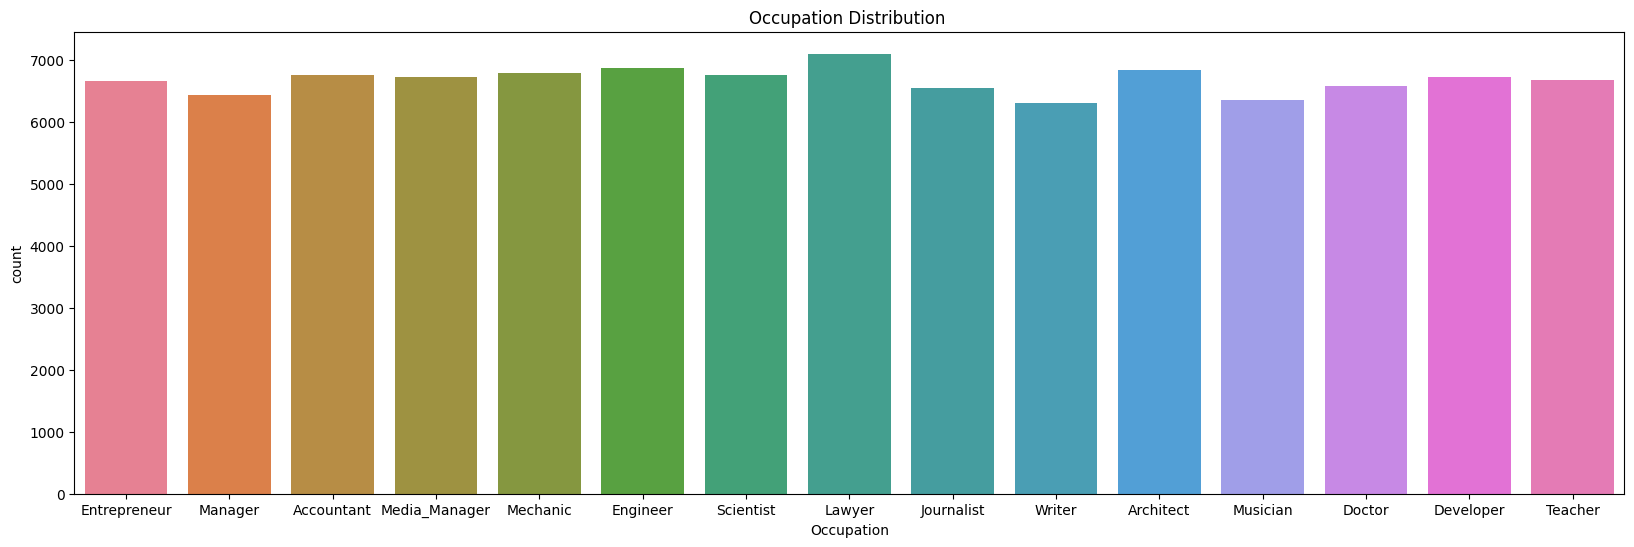

In [ ]:
# plot Months destribution :
plot_categorical_distribution(data_converted,'Occupation')

## **8.Annual Income** :

In [ ]:
# Check for missing values
data_converted['Annual_Income'].isna().sum()

6980

In [ ]:
# Before
data_converted[data_converted['Customer_ID'] == 'CUS_0x1000']['Annual_Income']

56752    30625.94
56753    30625.94
56754         NaN
56755    30625.94
56756    30625.94
56757    30625.94
56758    30625.94
56759    30625.94
Name: Annual_Income, dtype: float64

In [ ]:
data_converted=fill_missing_NA(data_converted,'Annual_Income','Customer_ID',flag=0)

In [ ]:
#After
data_converted[data_converted['Customer_ID'] == 'CUS_0x1000']['Annual_Income']

56752    30625.94
56753    30625.94
56754    30625.00
56755    30625.94
56756    30625.94
56757    30625.94
56758    30625.94
56759    30625.94
Name: Annual_Income, dtype: float64

In [ ]:
data_converted['Annual_Income'].isna().sum()

0

In [ ]:
data_converted['Annual_Income'].describe()

count    1.000000e+05
mean     1.796078e+05
std      1.401101e+06
min      7.005000e+03
25%      1.950558e+04
50%      3.779765e+04
75%      7.334999e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

Text(0.5, 1.0, 'Annual_Income Distribution with Density')

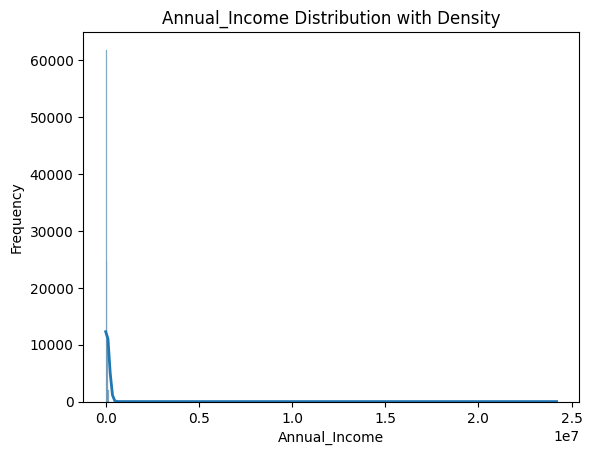

In [ ]:
# Plot distribution of Annual_Income

sns.histplot(data['Annual_Income'], kde=True, bins=512, line_kws={'linewidth': 2})


plt.xlabel('Annual_Income')
plt.ylabel('Frequency')
plt.title('Annual_Income Distribution with Density')


## **9.Monthly_Inhand_Salary** :

In [ ]:
# Check for missing values
data_converted['Monthly_Inhand_Salary'].isna().sum()

15002

In [ ]:
# Before
data_converted[data_converted['Customer_ID'] == 'CUS_0x1000']['Monthly_Inhand_Salary']

56752    2706.16
56753        NaN
56754    2706.16
56755    2706.16
56756    2706.16
56757    2706.16
56758    2706.16
56759    2706.16
Name: Monthly_Inhand_Salary, dtype: float64

In [ ]:
data_converted=fill_missing_NA(data_converted,'Monthly_Inhand_Salary','Customer_ID',flag=0)

In [ ]:
#After
data_converted[data_converted['Customer_ID'] == 'CUS_0x1000']['Monthly_Inhand_Salary']

56752    2706.16
56753    2706.00
56754    2706.16
56755    2706.16
56756    2706.16
56757    2706.16
56758    2706.16
56759    2706.16
Name: Monthly_Inhand_Salary, dtype: float64

In [ ]:
data_converted['Monthly_Inhand_Salary'].isna().sum()

0

In [ ]:
data_converted['Monthly_Inhand_Salary'].describe()

count    100000.000000
mean       4198.393526
std        3187.369003
min         303.650000
25%        1626.590000
50%        3096.000000
75%        5961.640000
max       15204.630000
Name: Monthly_Inhand_Salary, dtype: float64

Text(0.5, 1.0, 'Monthly_Inhand_Salary Distribution with Density')

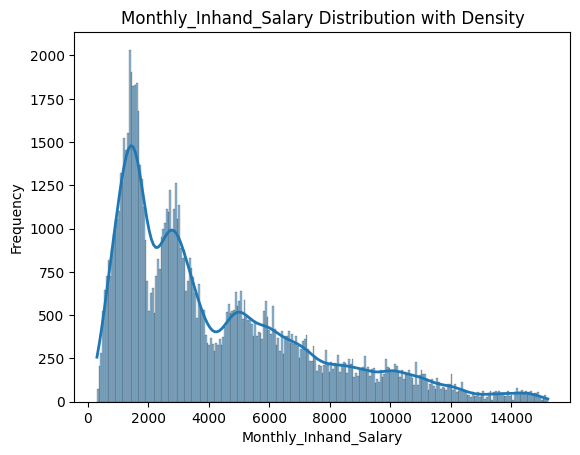

In [ ]:
# Plot distribution of Monthly_Inhand_Salary

sns.histplot(data['Monthly_Inhand_Salary'], kde=True, bins=255, line_kws={'linewidth': 2})


plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Frequency')
plt.title('Monthly_Inhand_Salary Distribution with Density')


## **10.Number of bank Accounts** :

In [ ]:
np.unique(data_converted.Customer_ID)

array(['CUS_0x1000', 'CUS_0x1009', 'CUS_0x100b', ..., 'CUS_0xff6',
       'CUS_0xffc', 'CUS_0xffd'], dtype=object)

In [ ]:
# Check for missing values
data_converted['Num_Credit_Card'].isna().sum()

0

In [ ]:
# Example of a unique customer
data_converted[data_converted['Customer_ID'] == 'CUS_0x1009']['Num_Credit_Card']

13760    5.0
13761    5.0
13762    5.0
13763    5.0
13764    5.0
13765    5.0
13766    5.0
13767    5.0
Name: Num_Credit_Card, dtype: float64

In [ ]:
data_converted['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [ ]:
# Replace the -1 number of bank accounts with 0
data_converted['Num_Bank_Accounts'] = data_converted['Num_Bank_Accounts'].where(data_converted['Num_Bank_Accounts'] > 0, 0)

#Replace the extreme values with an upper bound of 20 bank account per person
threshold = 15
limit_value = 15

# Replace values above the threshold with the limit value
data_converted['Num_Bank_Accounts'] = data_converted['Num_Bank_Accounts'].where(data_converted['Num_Bank_Accounts'] <= threshold, limit_value)


Text(0.5, 1.0, 'Num_Bank_Accounts Distribution with Density')

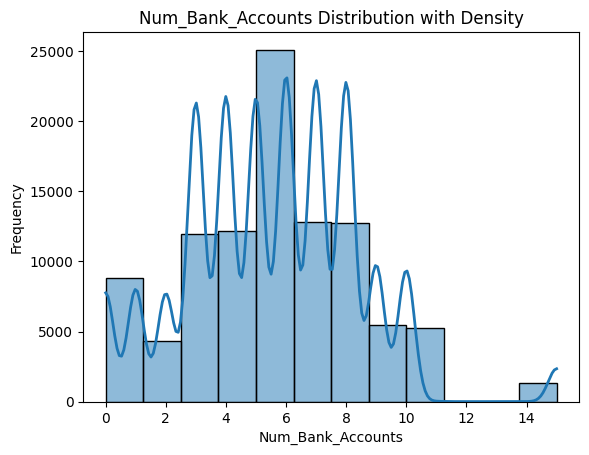

In [ ]:
# Plot distribution of Num_Bank_Accounts

sns.histplot(data['Num_Bank_Accounts'], kde=True, bins=12, line_kws={'linewidth': 2})


plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Frequency')
plt.title('Num_Bank_Accounts Distribution with Density')


## **11.Number of Credit Cards** :

In [ ]:
# Check for missing values
data_converted['Num_Credit_Card'].isna().sum()

0

In [ ]:
# Example of a unique customer
data_converted[data_converted['Customer_ID'] == 'CUS_0x1000']['Num_Credit_Card']

56752    5.0
56753    5.0
56754    5.0
56755    5.0
56756    5.0
56757    5.0
56758    5.0
56759    5.0
Name: Num_Credit_Card, dtype: float64

In [ ]:
data_converted['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [ ]:

#Replace the extreme values with an upper bound of 20 bank account per person
threshold = 15
limit_value = 15

# Replace values above the threshold with the limit value
data_converted['Num_Credit_Card'] = data_converted['Num_Credit_Card'].where(data_converted['Num_Credit_Card'] <= threshold, limit_value)


In [ ]:
data_converted['Num_Credit_Card'].describe()

count    100000.00000
mean          5.74831
std           2.48341
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max          15.00000
Name: Num_Credit_Card, dtype: float64

Text(0.5, 1.0, 'Num_Credit_Card Distribution with Density')

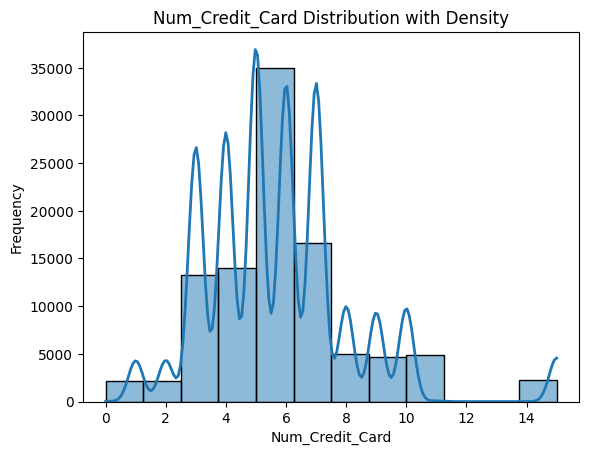

In [ ]:
# Plot distribution of Num_Credit_Card

sns.histplot(data['Num_Credit_Card'], kde=True, bins=12, line_kws={'linewidth': 2})


plt.xlabel('Num_Credit_Card')
plt.ylabel('Frequency')
plt.title('Num_Credit_Card Distribution with Density')


## **12.Intrest Rate** :

In [ ]:
data_converted.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
# Check for missing values
data_converted['Interest_Rate'].isna().sum()

0

In [ ]:
# Example of a unique customer
data_converted[data_converted['Customer_ID'] == 'CUS_0x1000']['Interest_Rate']

56752    27.0
56753    27.0
56754    27.0
56755    27.0
56756    27.0
56757    27.0
56758    27.0
56759    27.0
Name: Interest_Rate, dtype: float64

In [ ]:
data_converted['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [ ]:

#Replace the extreme values with an upper bound of 30 %  Intrest rate
threshold = 35
limit_value = 35

# Replace values above the threshold with the limit value
data_converted['Interest_Rate'] = data_converted['Interest_Rate'].where(data_converted['Interest_Rate'] <= threshold, limit_value)


In [ ]:
data_converted['Interest_Rate'].describe()

count    100000.000000
mean         14.947930
std           9.120189
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max          35.000000
Name: Interest_Rate, dtype: float64

Text(0.5, 1.0, 'Interest_Rate Distribution with Density')

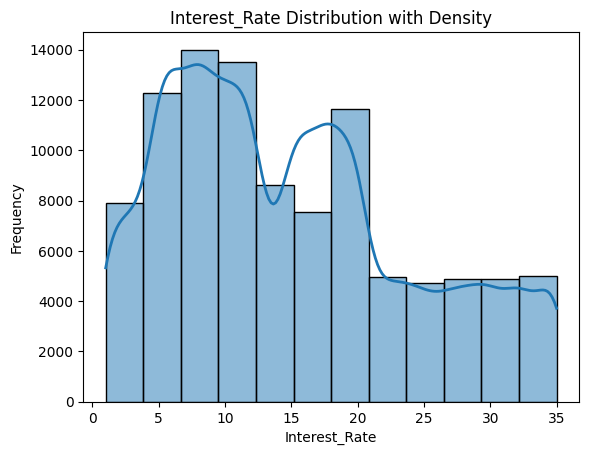

In [ ]:
# Plot distribution of Interest_Rate

sns.histplot(data['Interest_Rate'], kde=True, bins=12, line_kws={'linewidth': 2})


plt.xlabel('Interest_Rate')
plt.ylabel('Frequency')
plt.title('Interest_Rate Distribution with Density')


## **13.Number of Loans**:

In [ ]:
# Check for missing values
data_converted['Num_of_Loan'].isna().sum()

8661

In [ ]:
# Example of a unique customer
data_converted[data_converted['Customer_ID'] == 'CUS_0x100b']['Num_of_Loan']

1528    0.0
1529    0.0
1530    0.0
1531    0.0
1532    0.0
1533    0.0
1534    NaN
1535    0.0
Name: Num_of_Loan, dtype: float64

In [ ]:
data_converted=fill_missing_NA(data_converted,'Num_of_Loan','Customer_ID',flag=0)

In [ ]:
#After
data_converted[data_converted['Customer_ID'] == 'CUS_0x100b']['Num_of_Loan']

1528    0.0
1529    0.0
1530    0.0
1531    0.0
1532    0.0
1533    0.0
1534    0.0
1535    0.0
Name: Num_of_Loan, dtype: float64

In [ ]:
data_converted['Num_of_Loan'].isna().sum()

0

In [ ]:
data_converted['Num_of_Loan'].describe()

count    100000.000000
mean          7.155900
std          57.846335
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

In [ ]:

#Replace the extreme values with an upper bound of 10 Loans
threshold = 12
limit_value = 12

# Replace values above the threshold with the limit value
data_converted['Num_of_Loan'] = data_converted['Num_of_Loan'].where(data_converted['Num_of_Loan'] <= threshold, limit_value)


In [ ]:
data_converted['Num_of_Loan'].describe()

count    100000.000000
mean          3.594950
std           2.540254
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          12.000000
Name: Num_of_Loan, dtype: float64

Text(0.5, 1.0, 'Num_of_Loan Distribution with Density')

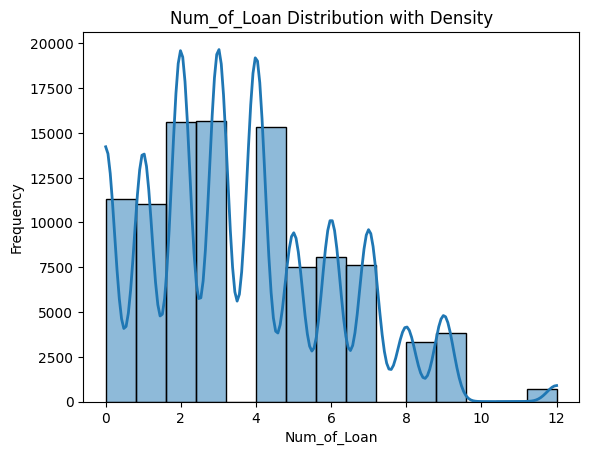

In [ ]:
# Plot distribution of Num_of_Loan

sns.histplot(data['Num_of_Loan'], kde=True, bins=15, line_kws={'linewidth': 2})


plt.xlabel('Num_of_Loan')
plt.ylabel('Frequency')
plt.title('Num_of_Loan Distribution with Density')


## **14.Delay from due Date**  :

In [ ]:
# Check for missing values
data_converted['Delay_from_due_date'].isna().sum()

0

In [ ]:
# Example of a unique customer
data_converted[data_converted['Customer_ID'] == 'CUS_0x1048']['Delay_from_due_date']

63272     7.0
63273     9.0
63274     9.0
63275     9.0
63276    11.0
63277     9.0
63278    11.0
63279     9.0
Name: Delay_from_due_date, dtype: float64

In [ ]:
data_converted['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [ ]:

# Replace the negative values with 0
data_converted['Delay_from_due_date'] = data_converted['Delay_from_due_date'].where(data_converted['Delay_from_due_date'] >= 0, 0)


In [ ]:
data_converted['Delay_from_due_date'].describe()

count    100000.000000
mean         21.081910
std          14.840204
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

Text(0.5, 1.0, 'Delay_from_due_date Distribution with Density')

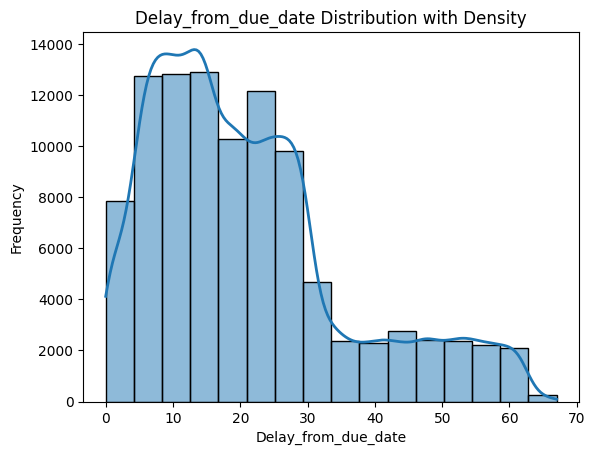

In [ ]:
# Plot distribution of Delay_from_due_date

sns.histplot(data['Delay_from_due_date'], kde=True, bins=16, line_kws={'linewidth': 2})


plt.xlabel('Delay_from_due_date')
plt.ylabel('Frequency')
plt.title('Delay_from_due_date Distribution with Density')


## **15.Number of Delayed Payments** :

In [ ]:
# Check for missing values
data_converted['Num_of_Delayed_Payment'].isna().sum()

10368

In [ ]:
# Example of a unique customer
data_converted[data_converted['Customer_ID'] == 'CUS_0x102e']['Num_of_Delayed_Payment']

60336    10.0
60337    10.0
60338     8.0
60339    10.0
60340     NaN
60341    10.0
60342    10.0
60343     9.0
Name: Num_of_Delayed_Payment, dtype: float64

In [ ]:
data_converted=fill_missing_NA(data_converted,'Num_of_Delayed_Payment','Customer_ID',flag=1)

In [ ]:
#After
data_converted[data_converted['Customer_ID'] == 'CUS_0x102e']['Num_of_Delayed_Payment']

60336    10.0
60337    10.0
60338     8.0
60339    10.0
60340     9.0
60341    10.0
60342    10.0
60343     9.0
Name: Num_of_Delayed_Payment, dtype: float64

In [ ]:
data_converted['Num_of_Delayed_Payment'].isna().sum()

0

In [ ]:
data_converted['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         31.550100
std         230.321436
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [ ]:

#Replace the extreme values with an upper bound of 30 maximum delayed paymentes
threshold = 30
limit_value = 30

# Replace values above the threshold with the limit value
data_converted['Num_of_Delayed_Payment'] = data_converted['Num_of_Delayed_Payment'].where(data_converted['Num_of_Delayed_Payment'] <= threshold, limit_value)


In [ ]:
data_converted['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         13.475290
std           6.418254
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          30.000000
Name: Num_of_Delayed_Payment, dtype: float64

Text(0.5, 1.0, 'Num_of_Delayed_Payment Distribution with Density')

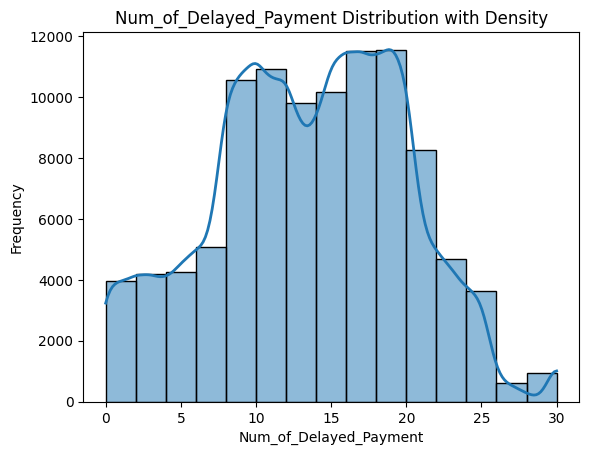

In [ ]:
# Plot distribution of Num_of_Delayed_Payment

sns.histplot(data['Num_of_Delayed_Payment'], kde=True, bins=15, line_kws={'linewidth': 2})


plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Frequency')
plt.title('Num_of_Delayed_Payment Distribution with Density')


## **16.Changed Credit Limit** :  

In [ ]:
data_converted['Changed_Credit_Limit'].describe()

count    96323.000000
mean        10.599042
std          6.639966
min          0.000000
25%          5.570000
50%          9.520000
75%         15.010000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

Text(0.5, 1.0, 'Changed_Credit_Limit Distribution with Density')

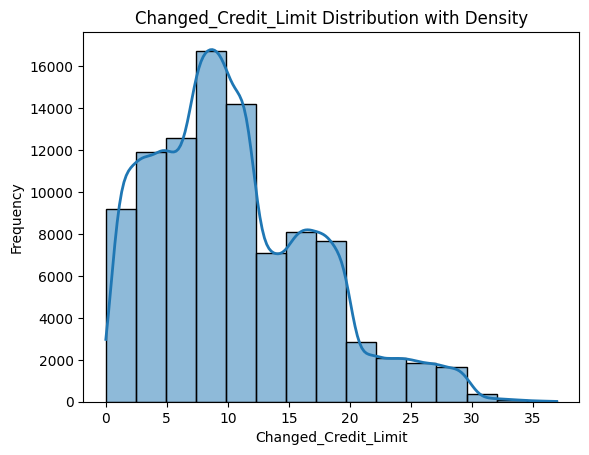

In [ ]:
# Plot distribution of Changed_Credit_Limit

sns.histplot(data['Changed_Credit_Limit'], kde=True, bins=15, line_kws={'linewidth': 2})


plt.xlabel('Changed_Credit_Limit')
plt.ylabel('Frequency')
plt.title('Changed_Credit_Limit Distribution with Density')


## **17.Number of Credit Inquiries** :

In [ ]:
# Check for missing values
data_converted['Num_Credit_Inquiries'].isna().sum()

1965

In [ ]:
data_converted=fill_missing_NA(data_converted,'Num_Credit_Inquiries','Customer_ID',flag=0)

In [ ]:
data_converted['Num_Credit_Inquiries'].isna().sum()

0

In [ ]:
data_converted['Num_Credit_Inquiries'].describe()

count    100000.000000
mean         27.689500
std         191.508964
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max        2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [ ]:

#Replace the extreme values with an upper bound of 12 Inquiries Max
threshold = 12
limit_value = 12

# Replace values above the threshold with the limit value
data_converted['Num_Credit_Inquiries'] = data_converted['Num_Credit_Inquiries'].where(data_converted['Num_Credit_Inquiries'] <= threshold, limit_value)


In [ ]:
data_converted['Num_Credit_Inquiries'].describe()

count    100000.000000
mean          5.797090
std           3.727369
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: Num_Credit_Inquiries, dtype: float64

Text(0.5, 1.0, 'Num_Credit_Inquiries Distribution with Density')

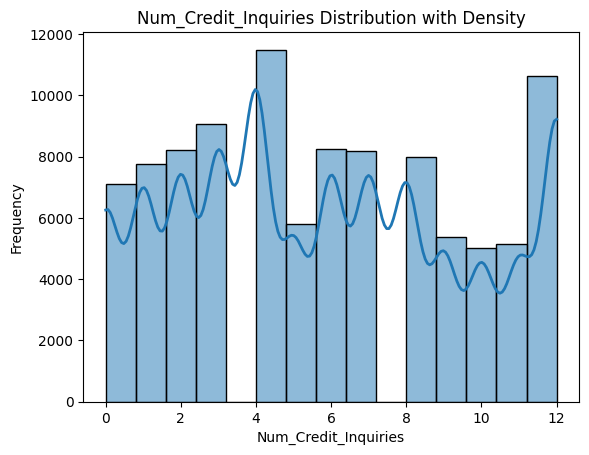

In [ ]:
# Plot distribution of Num_Credit_Inquiries

sns.histplot(data['Num_Credit_Inquiries'], kde=True, bins=15, line_kws={'linewidth': 2})


plt.xlabel('Num_Credit_Inquiries')
plt.ylabel('Frequency')
plt.title('Num_Credit_Inquiries Distribution with Density')


## **18.Credit Mix** :

In [ ]:
# Check for missing values
data_converted['Credit_Mix'].isna().sum()

0

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Credit_Mix'])
print_distributions(categorical_dist)

------ Credit_Mix ------

 Data:
Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64


In [ ]:
data_converted["Credit_Mix"] = data_converted["Credit_Mix"].replace("_", None)

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Credit_Mix'])
print_distributions(categorical_dist)

------ Credit_Mix ------

 Data:
Standard    36479
Good        24337
Bad         18989
Name: Credit_Mix, dtype: int64


In [ ]:
np.unique(data_converted.Customer_ID)[0:10]

array(['CUS_0x1000', 'CUS_0x1009', 'CUS_0x100b', 'CUS_0x1011',
       'CUS_0x1013', 'CUS_0x1015', 'CUS_0x1018', 'CUS_0x1026',
       'CUS_0x102d', 'CUS_0x102e'], dtype=object)

In [ ]:
# Before
data_converted[data_converted['Customer_ID'] == 'CUS_0x102d']['Credit_Mix']

15728    Good
15729    Good
15730    Good
15731    Good
15732    Good
15733    Good
15734    Good
15735    None
Name: Credit_Mix, dtype: object

In [ ]:

data_converted=fill_missing_NA(data_converted,'Credit_Mix','Customer_ID',flag=1)

print(f"Numer of Missing Values in the column Credit_Mix after filling Na's : {data_converted['Credit_Mix'].isna().sum()}")

Numer of Missing Values in the column Credit_Mix after filling Na's : 0


In [ ]:
# After
data_converted[data_converted['Customer_ID'] == 'CUS_0x102d']['Credit_Mix']

15728    Good
15729    Good
15730    Good
15731    Good
15732    Good
15733    Good
15734    Good
15735    Good
Name: Credit_Mix, dtype: object

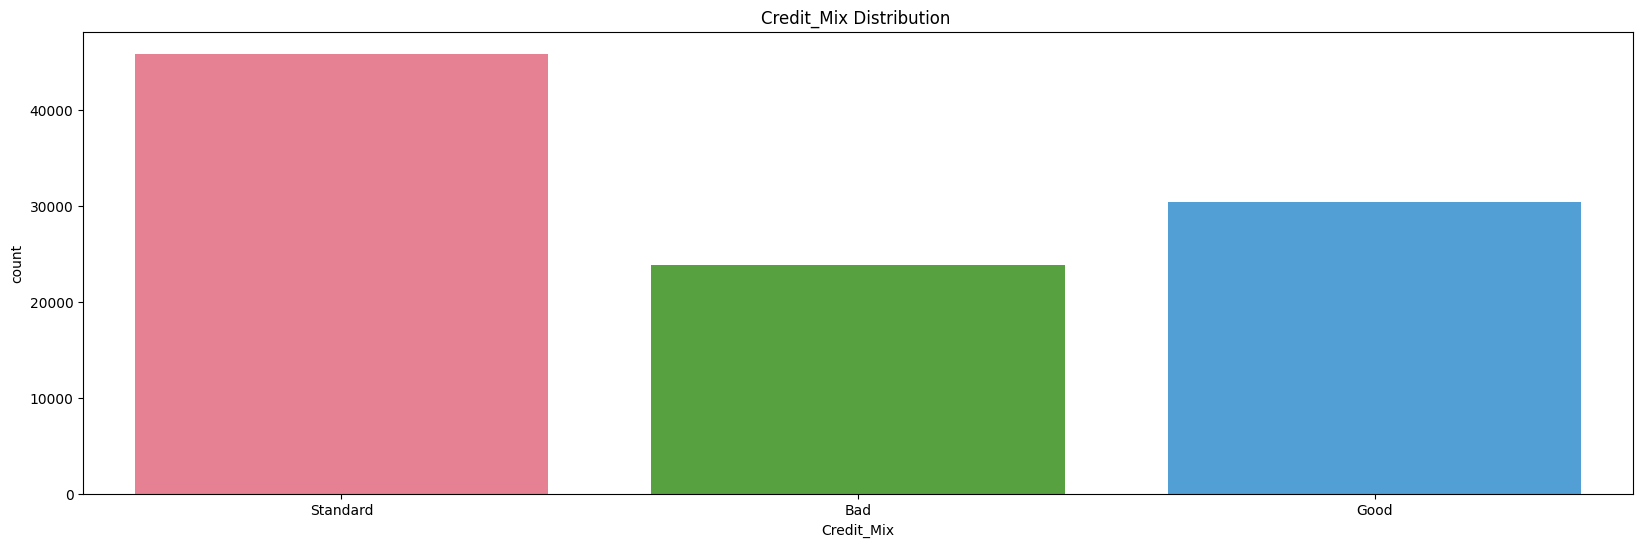

In [ ]:
# plot Months destribution :
plot_categorical_distribution(data_converted,'Credit_Mix')

## **19.Outstanding Debt** :

In [ ]:
# Check for missing values
data_converted['Outstanding_Debt'].isna().sum()

1009

In [ ]:
data_converted=fill_missing_NA(data_converted,'Outstanding_Debt','Customer_ID',flag=0)

In [ ]:
data_converted['Outstanding_Debt'].isna().sum()

0

In [ ]:
data_converted['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.215368
std        1155.129195
min           0.230000
25%         566.050000
50%        1166.080000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

Text(0.5, 1.0, 'Outstanding_Debt Distribution with Density')

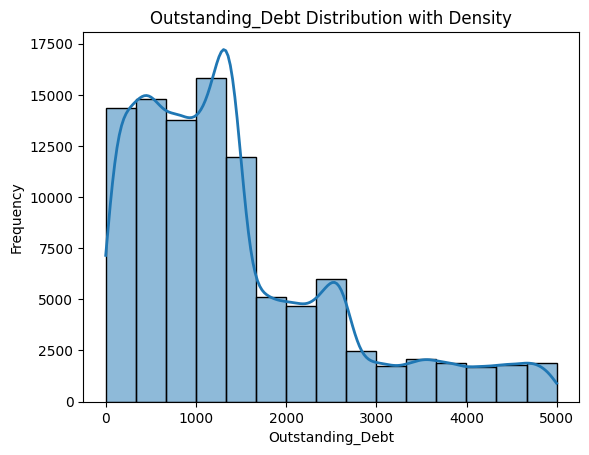

In [ ]:
# Plot distribution of Outstanding_Debt

sns.histplot(data['Outstanding_Debt'], kde=True, bins=15, line_kws={'linewidth': 2})


plt.xlabel('Outstanding_Debt')
plt.ylabel('Frequency')
plt.title('Outstanding_Debt Distribution with Density')


## 20.Credit Utilization Ratio :

In [ ]:
# Check for missing values
data_converted['Credit_Utilization_Ratio'].isna().sum()

0

In [ ]:
data_converted['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285184
std           5.116880
min          20.000000
25%          28.050000
50%          32.310000
75%          36.500000
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

Text(0.5, 1.0, 'Credit_Utilization_Ratio Distribution with Density')

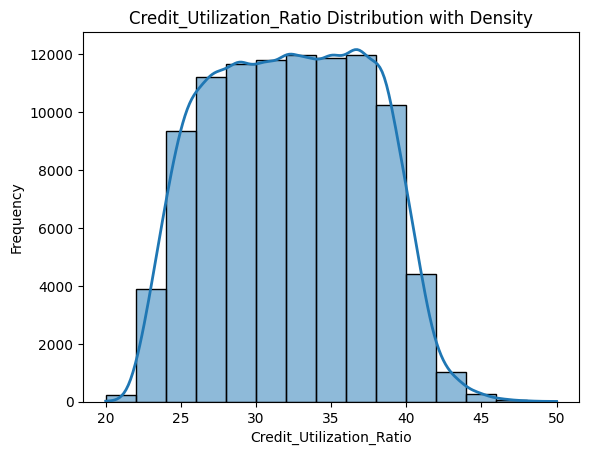

In [ ]:
# Plot distribution of Credit_Utilization_Ratio

sns.histplot(data['Credit_Utilization_Ratio'], kde=True, bins=15, line_kws={'linewidth': 2})


plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Frequency')
plt.title('Credit_Utilization_Ratio Distribution with Density')


## 21.Payment of Min Amount :

In [ ]:
# Check for missing values
data_converted['Payment_of_Min_Amount'].isna().sum()

0

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Payment_of_Min_Amount'])
print_distributions(categorical_dist)

------ Payment_of_Min_Amount ------

 Data:
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64


In [ ]:
data_converted["Payment_of_Min_Amount"] = data_converted["Payment_of_Min_Amount"].replace("NM", None)

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Payment_of_Min_Amount'])
print_distributions(categorical_dist)

------ Payment_of_Min_Amount ------

 Data:
Yes    52326
No     35667
Name: Payment_of_Min_Amount, dtype: int64


In [ ]:
np.unique(data_converted.Customer_ID)[0:10]

array(['CUS_0x1000', 'CUS_0x1009', 'CUS_0x100b', 'CUS_0x1011',
       'CUS_0x1013', 'CUS_0x1015', 'CUS_0x1018', 'CUS_0x1026',
       'CUS_0x102d', 'CUS_0x102e'], dtype=object)

In [ ]:
# Before
data_converted[data_converted['Customer_ID'] == 'CUS_0x102d']['Payment_of_Min_Amount']

15728      No
15729      No
15730      No
15731    None
15732      No
15733      No
15734      No
15735      No
Name: Payment_of_Min_Amount, dtype: object

In [ ]:

data_converted=fill_missing_NA(data_converted,'Payment_of_Min_Amount','Customer_ID',flag=1)

print(f"Numer of Missing Values in the column Payment_of_Min_Amount after filling Na's : {data_converted['Payment_of_Min_Amount'].isna().sum()}")

Numer of Missing Values in the column Payment_of_Min_Amount after filling Na's : 0


In [ ]:
# After
data_converted[data_converted['Customer_ID'] == 'CUS_0x102d']['Payment_of_Min_Amount']

15728    No
15729    No
15730    No
15731    No
15732    No
15733    No
15734    No
15735    No
Name: Payment_of_Min_Amount, dtype: object

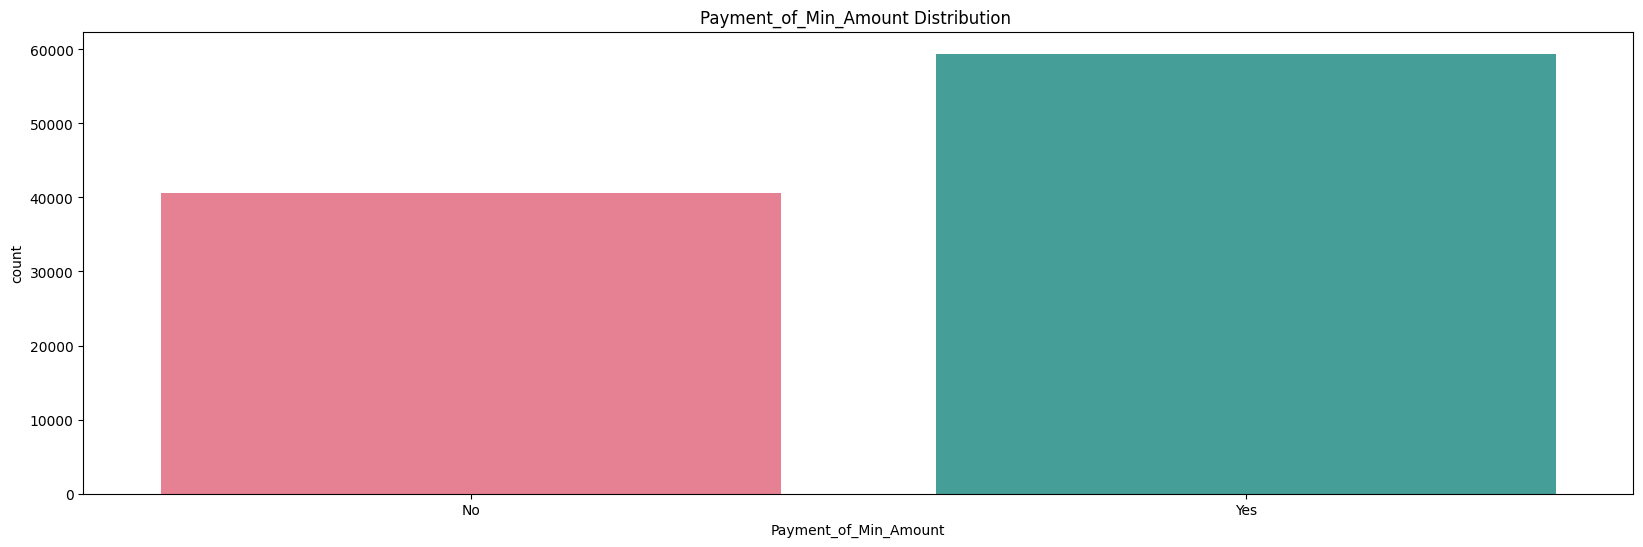

In [ ]:
# plot Months destribution :
plot_categorical_distribution(data_converted,'Payment_of_Min_Amount')

In [ ]:
# Example of a unique customer
data_converted[data_converted['Customer_ID'] == 'CUS_0x100b']['Payment_of_Min_Amount']

1528    No
1529    No
1530    No
1531    No
1532    No
1533    No
1534    No
1535    No
Name: Payment_of_Min_Amount, dtype: object

## **22.Total EMI per month** :

In [ ]:
# Check for missing values
data_converted['Total_EMI_per_month'].isna().sum()

0

In [ ]:
data_converted['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118254
std        8306.041264
min           0.000000
25%          30.310000
50%          69.250000
75%         161.220000
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [ ]:

#Replace the extreme values with an upper bound of 5000 monthly payment
threshold = 1000
limit_value = 1000

# Replace values above the threshold with the limit value
data_converted['Total_EMI_per_month'] = data_converted['Total_EMI_per_month'].where(data_converted['Total_EMI_per_month'] <= threshold, limit_value)


In [ ]:
data_converted['Total_EMI_per_month'].describe()

count    100000.000000
mean        134.487534
std         197.077303
min           0.000000
25%          30.310000
50%          69.250000
75%         161.220000
max        1000.000000
Name: Total_EMI_per_month, dtype: float64

Text(0.5, 1.0, 'Total_EMI_per_month Distribution with Density')

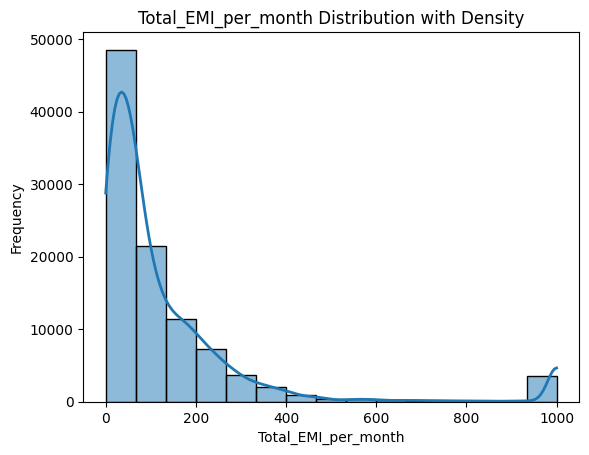

In [ ]:
# Plot distribution of Total_EMI_per_month

sns.histplot(data['Total_EMI_per_month'], kde=True, bins=15, line_kws={'linewidth': 2})


plt.xlabel('Total_EMI_per_month')
plt.ylabel('Frequency')
plt.title('Total_EMI_per_month Distribution with Density')


## **23.Amount_invested_monthly** :

In [ ]:
# Check for missing values
data_converted['Amount_invested_monthly'].isna().sum()

8784

In [ ]:
# Example of a unique customer
data_converted[data_converted['Customer_ID'] == 'CUS_0x100b']['Amount_invested_monthly']

1528    397.24
1529    661.62
1530       NaN
1531       NaN
1532    758.08
1533    424.00
1534    174.29
1535    617.08
Name: Amount_invested_monthly, dtype: float64

In [ ]:
data_converted=fill_missing_NA(data_converted,'Amount_invested_monthly','Customer_ID',flag=0)

In [ ]:
#After
data_converted[data_converted['Customer_ID'] == 'CUS_0x100b']['Amount_invested_monthly']

1528    397.24
1529    661.62
1530    505.00
1531    505.00
1532    758.08
1533    424.00
1534    174.29
1535    617.08
Name: Amount_invested_monthly, dtype: float64

In [ ]:
data_converted['Amount_invested_monthly'].isna().sum()

0

In [ ]:
data_converted['Amount_invested_monthly'].describe()

count    100000.000000
mean        195.708264
std         195.116044
min           0.000000
25%          74.550000
50%         131.110000
75%         239.462500
max        1977.330000
Name: Amount_invested_monthly, dtype: float64

Text(0.5, 1.0, 'Amount_invested_monthly Distribution with Density')

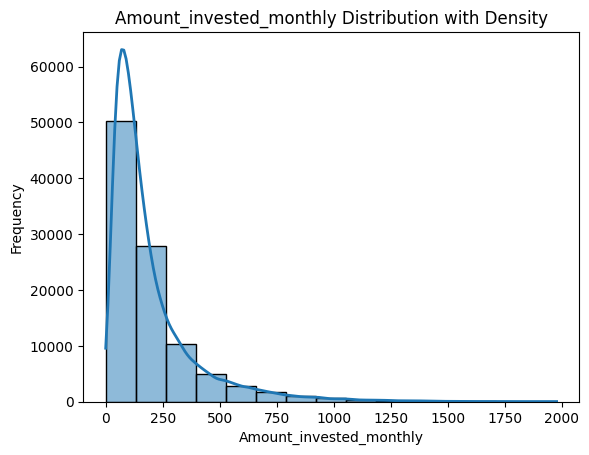

In [ ]:
# Plot distribution of Amount_invested_monthly

sns.histplot(data['Amount_invested_monthly'], kde=True, bins=15, line_kws={'linewidth': 2})


plt.xlabel('Amount_invested_monthly')
plt.ylabel('Frequency')
plt.title('Amount_invested_monthly Distribution with Density')


## **24.Payment Behaviour** :

In [ ]:
# Check for missing values
data_converted['Payment_Behaviour'].isna().sum()

0

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Payment_Behaviour'])
print_distributions(categorical_dist)

------ Payment_Behaviour ------

 Data:
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64


In [ ]:
data_converted["Payment_Behaviour"] = data_converted["Payment_Behaviour"].replace("!@9#%8", None)

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Payment_Behaviour'])
print_distributions(categorical_dist)

------ Payment_Behaviour ------

 Data:
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64


In [ ]:
np.unique(data_converted.Customer_ID)[0:10]

array(['CUS_0x1000', 'CUS_0x1009', 'CUS_0x100b', 'CUS_0x1011',
       'CUS_0x1013', 'CUS_0x1015', 'CUS_0x1018', 'CUS_0x1026',
       'CUS_0x102d', 'CUS_0x102e'], dtype=object)

In [ ]:
# Before
data_converted[data_converted['Customer_ID'] == 'CUS_0x102d']['Payment_Behaviour']

15728     Low_spent_Medium_value_payments
15729      Low_spent_Large_value_payments
15730     Low_spent_Medium_value_payments
15731     Low_spent_Medium_value_payments
15732     Low_spent_Medium_value_payments
15733     High_spent_Large_value_payments
15734     Low_spent_Medium_value_payments
15735    High_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

In [ ]:

data_converted=fill_missing_NA(data_converted,'Payment_Behaviour','Customer_ID',flag=1)

print(f"Numer of Missing Values in the column Payment_Behaviour after filling Na's : {data_converted['Payment_Behaviour'].isna().sum()}")

Numer of Missing Values in the column Payment_Behaviour after filling Na's : 0


In [ ]:
# After
data_converted[data_converted['Customer_ID'] == 'CUS_0x102d']['Payment_Behaviour']

15728     Low_spent_Medium_value_payments
15729      Low_spent_Large_value_payments
15730     Low_spent_Medium_value_payments
15731     Low_spent_Medium_value_payments
15732     Low_spent_Medium_value_payments
15733     High_spent_Large_value_payments
15734     Low_spent_Medium_value_payments
15735    High_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

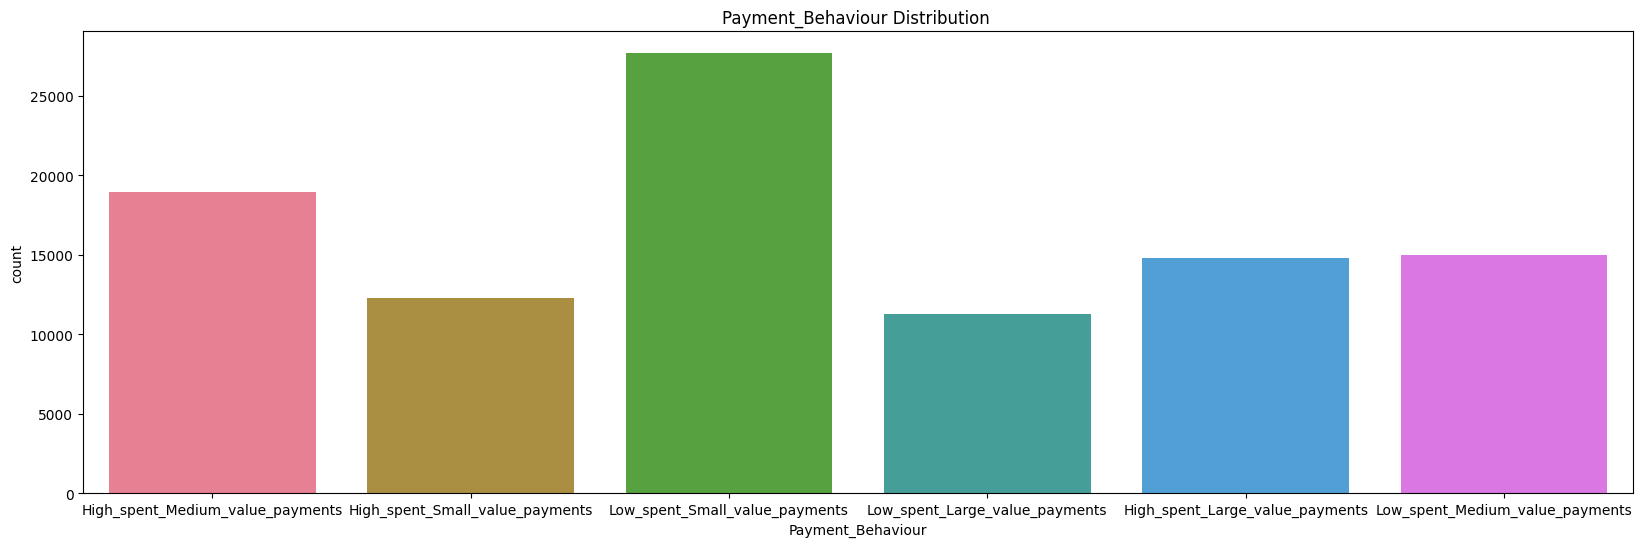

In [ ]:
# plot Months destribution :
plot_categorical_distribution(data_converted,'Payment_Behaviour')

## **25.Monthly_Balance** :

In [ ]:
# Check for missing values
data_converted['Monthly_Balance'].isna().sum()

1209

In [ ]:
data_converted=fill_missing_NA(data_converted,'Monthly_Balance','Customer_ID',flag=0)

In [ ]:
data_converted['Monthly_Balance'].isna().sum()

0

In [ ]:
data_converted['Monthly_Balance'].describe()

count    100000.000000
mean        403.114536
std         214.013096
min           0.010000
25%         270.190000
50%         337.110000
75%         471.572500
max        1602.040000
Name: Monthly_Balance, dtype: float64

Text(0.5, 1.0, 'Monthly_Balance Distribution with Density')

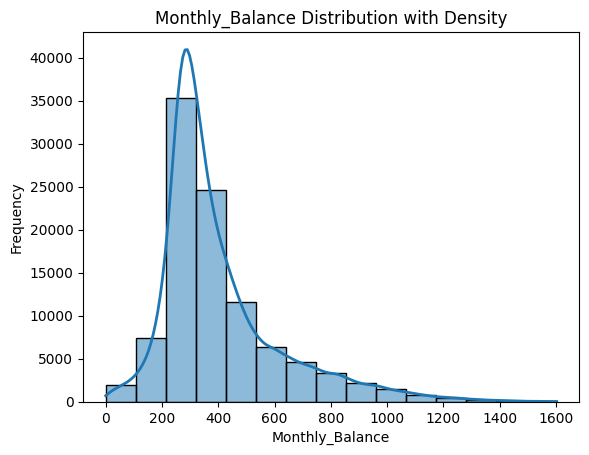

In [ ]:
# Plot distribution of Monthly_Balance

sns.histplot(data['Monthly_Balance'], kde=True, bins=15, line_kws={'linewidth': 2})


plt.xlabel('Monthly_Balance')
plt.ylabel('Frequency')
plt.title('Monthly_Balance Distribution with Density')


## **26.Credit History Age** :

In [ ]:

# convert the credit history age into float represantation ---> Example :
# "2 years 6 months" ----> 2.5

def convert_CHA_to_numeric(C_History_Age):
    # Extract years and months using regular expression, converting NAs to NaN
    years = C_History_Age.str.extract(r'(\d+)\s*Years').astype(float)
    months = C_History_Age.str.extract(r'(\d+)\s*Months').astype(float)

    # Convert years and months to a single decimal number, handling NaN values appropriately
    C_History_Age_new = years + months.divide(12, fill_value=pd.NA)

    return C_History_Age_new


In [ ]:
data_converted['Credit_History_Age'].isna().sum()

9030

In [ ]:
data_converted['Credit_History_Age']=convert_CHA_to_numeric(data_converted['Credit_History_Age'])

data_converted['Credit_History_Age']

0        22.083333
1              NaN
2        22.250000
3        22.333333
4        22.416667
           ...    
99995    31.500000
99996    31.583333
99997    31.666667
99998    31.750000
99999    31.833333
Name: Credit_History_Age, Length: 100000, dtype: float64

In [ ]:
data_converted=fill_missing_NA(data_converted,'Credit_History_Age','Customer_ID',flag=0)

In [ ]:
data_converted['Credit_History_Age'].isna().sum()

0

In [ ]:
data_converted['Credit_History_Age'].describe()

count    100000.000000
mean         18.390465
std           8.308590
min           0.000000
25%          12.000000
50%          18.250000
75%          25.083333
max          33.666667
Name: Credit_History_Age, dtype: float64

Text(0.5, 1.0, 'Credit_History_Age Distribution with Density')

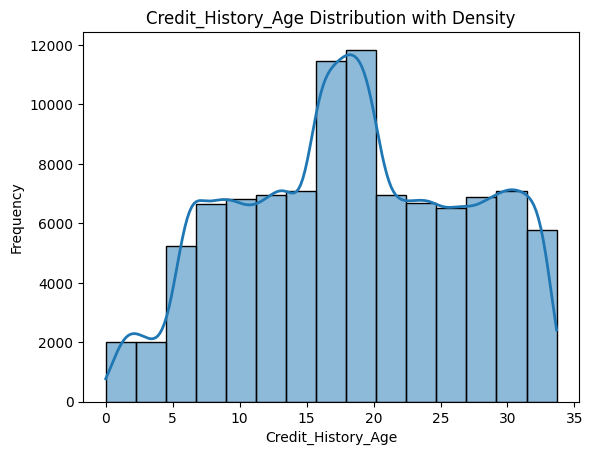

In [ ]:
# Plot distribution of Credit_History_Age

sns.histplot(data['Credit_History_Age'], kde=True, bins=15, line_kws={'linewidth': 2})


plt.xlabel('Credit_History_Age')
plt.ylabel('Frequency')
plt.title('Credit_History_Age Distribution with Density')


## **27.Credit Score "Target Column"** :

In [ ]:
# Check for missing values
data_converted['Credit_Score'].isna().sum()

0

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Credit_Score'])
print_distributions(categorical_dist)

------ Credit_Score ------

 Data:
Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


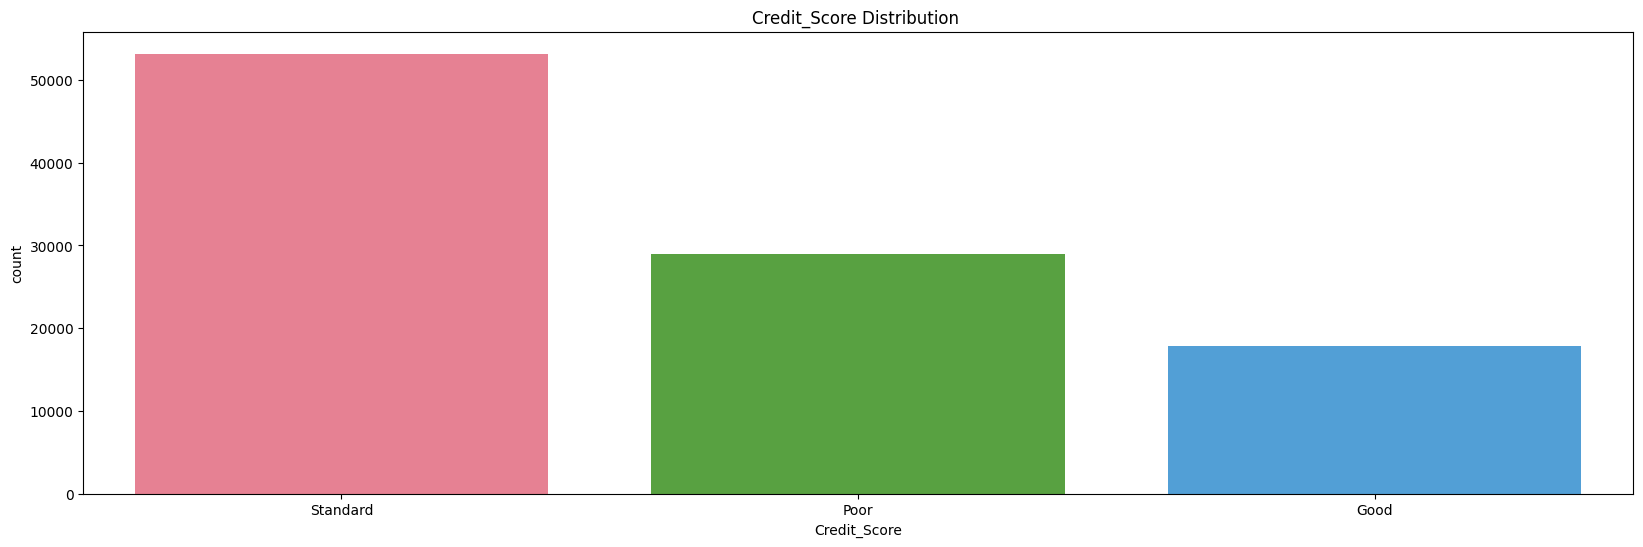

In [ ]:
# plot Months destribution :
plot_categorical_distribution(data_converted,'Credit_Score')

## **27.Type of Loan** :

In [ ]:
# Check for missing values
data_converted['Type_of_Loan'].isna().sum()

0

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Type_of_Loan'])
print_distributions(categorical_dist)

------ Type_of_Loan ------

 Data:
nan                                                                                                                                   11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                     

In [ ]:
data_converted["Type_of_Loan"] = data_converted["Type_of_Loan"].replace("nan", None)

In [ ]:
categorical_dist=get_categorical_distributions(data_converted,['Type_of_Loan'])
print_distributions(categorical_dist)

------ Type_of_Loan ------

 Data:
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                           

In [ ]:
np.unique(data_converted.Customer_ID)[0:10]

array(['CUS_0x1000', 'CUS_0x1009', 'CUS_0x100b', 'CUS_0x1011',
       'CUS_0x1013', 'CUS_0x1015', 'CUS_0x1018', 'CUS_0x1026',
       'CUS_0x102d', 'CUS_0x102e'], dtype=object)

In [ ]:
# Before
data_converted[data_converted['Customer_ID'] == 'CUS_0x1026']['Type_of_Loan']

77968    Payday Loan, and Auto Loan
77969    Payday Loan, and Auto Loan
77970    Payday Loan, and Auto Loan
77971    Payday Loan, and Auto Loan
77972    Payday Loan, and Auto Loan
77973    Payday Loan, and Auto Loan
77974    Payday Loan, and Auto Loan
77975    Payday Loan, and Auto Loan
Name: Type_of_Loan, dtype: object

In [ ]:

data_converted=fill_missing_NA(data_converted,'Type_of_Loan','Customer_ID',flag=1)

print(f"Numer of Missing Values in the column Type_of_Loan after filling Na's : {data_converted['Type_of_Loan'].isna().sum()}")

Numer of Missing Values in the column Type_of_Loan after filling Na's : 11408


In [ ]:

#You can one-hot encode information about the existence of various loan types
#by creating binary variables (1 for existence, 0 for non-existence) based on whether each loan type is present in a given dataset or context.

def Extract_type_of_loans(data, column_name):


    loan_type_split = data['Type_of_Loan'].str.split(r', and |, | and |,').dropna()

    # Flatten the resulting list of lists
    loan_types_list = [item.strip() for sublist in loan_type_split.tolist() for item in sublist]

    # Getting the unique loan types
    unique_loan_types = set(loan_types_list)

    for loan_type in unique_loan_types:
        if pd.notna(loan_type):
            new_column = (loan_type.replace(" ", "_")).lower()
            data[f'has_{new_column}'] = data['Type_of_Loan'].apply(lambda x: loan_type in x if pd.notna(x) else pd.NA)
            data[f'has_{new_column}'] = data[f'has_{new_column}'].apply(lambda x: int(x) if x is not pd.NA else x)

            # Filling null values with mode
            mode_value = data[f'has_{new_column}'].mode().iloc[0]
            data[f'has_{new_column}'].fillna(mode_value, inplace=True)

    data.drop('Type_of_Loan', axis=1, inplace=True)

    return data

def OneHot_Encode(data):
    cols = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour' ]
    # Perform one-hot encoding
    encoded = pd.get_dummies(data[cols])

    data = data.drop(cols, axis=1)

    data = pd.concat([data, encoded], axis=1)
    return data



def drop_unnecessary_columns(data):
    columns_to_drop=['ID','Customer_ID','SSN','Name','Month', 'Occupation', 'Credi_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour' ]
    cleaned_data = data.copy()

    # Drop the specified columns
    cleaned_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    return cleaned_data




In [ ]:
# Extract possible type of loans and drop the rest of the NA's
clean=Extract_type_of_loans(data_converted,'Type_of_Loan')
clean=clean.dropna()
# One hot encode the categorical variables
droped_data=OneHot_Encode(clean)
# Drop the unnecessary columns for modelling
final_data=drop_unnecessary_columns(droped_data)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96323 entries, 0 to 99999
Data columns (total 61 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 96323 non-null  float64
 1   Annual_Income                                       96323 non-null  float64
 2   Monthly_Inhand_Salary                               96323 non-null  float64
 3   Num_Bank_Accounts                                   96323 non-null  float64
 4   Num_Credit_Card                                     96323 non-null  float64
 5   Interest_Rate                                       96323 non-null  float64
 6   Num_of_Loan                                         96323 non-null  float64
 7   Delay_from_due_date                                 96323 non-null  float64
 8   Num_of_Delayed_Payment                              96323 non-null  float64


In [ ]:
final_data.dropna().shape

(96323, 61)

# ⭐ **Multivariate Analysis** :

## categorical data & credit score :

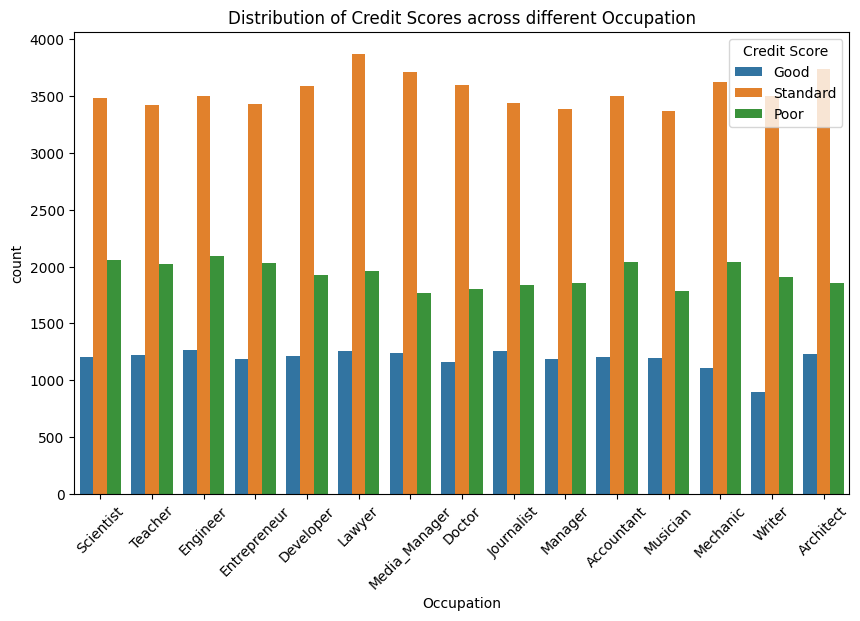

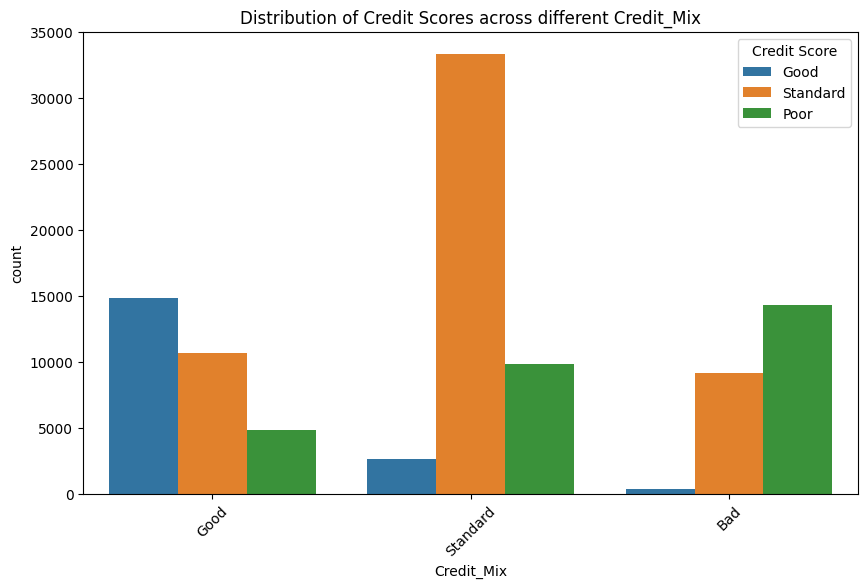

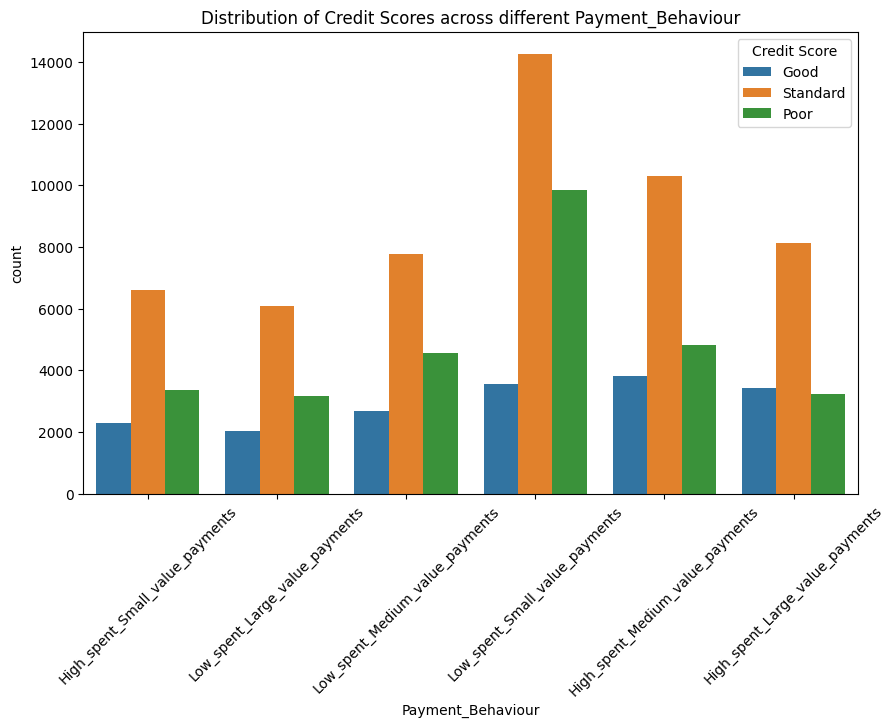

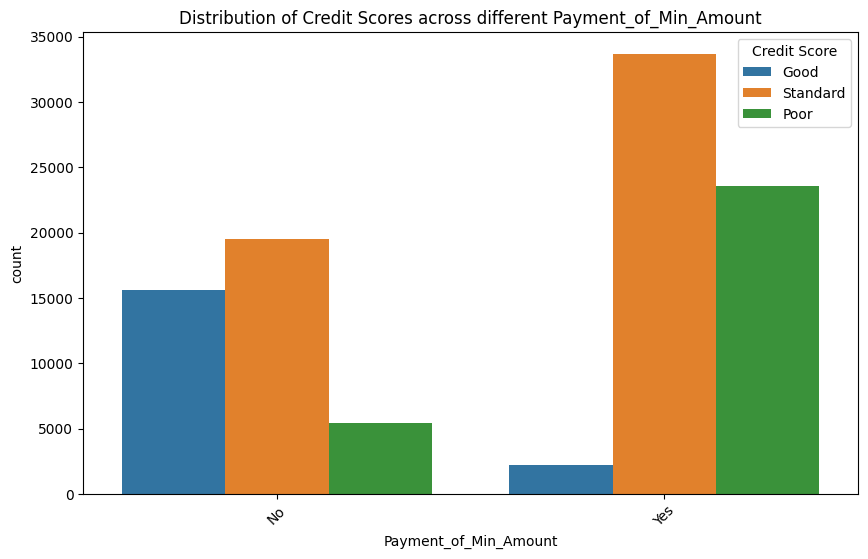

In [ ]:
# To continue the analysis, we will now explore how different categorical variables relate to the Credit Score.


categorical_columns = data.select_dtypes(include=['object']).columns

# We will visualize how these categorical variables distribute across different credit score categories.

# Defining a function to create bar plots for categorical variables against Credit Score
def plot_categorical_distribution_credit_score(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Credit_Score', data=data)
    plt.title(f'Distribution of Credit Scores across different {column}')
    plt.xticks(rotation=45)
    plt.legend(title='Credit Score')
    plt.show()

# Visualizing for some selected categorical variables
selected_categorical_columns = ['Occupation','Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount' ]
for col in selected_categorical_columns:
    plot_categorical_distribution_credit_score(col)

## Monthly Income vs. Credit Score :

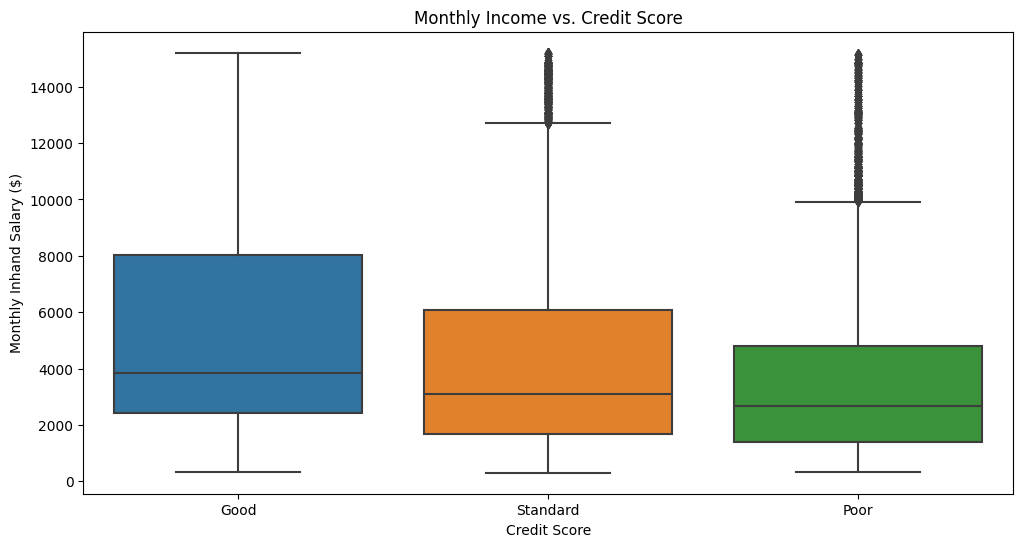

In [ ]:
# Visualizing the relationship between Monthly Income and Credit Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=data)
plt.title('Monthly Income vs. Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Inhand Salary ($)')
plt.show()

## Number of Bank Accounts vs. Credit Score :

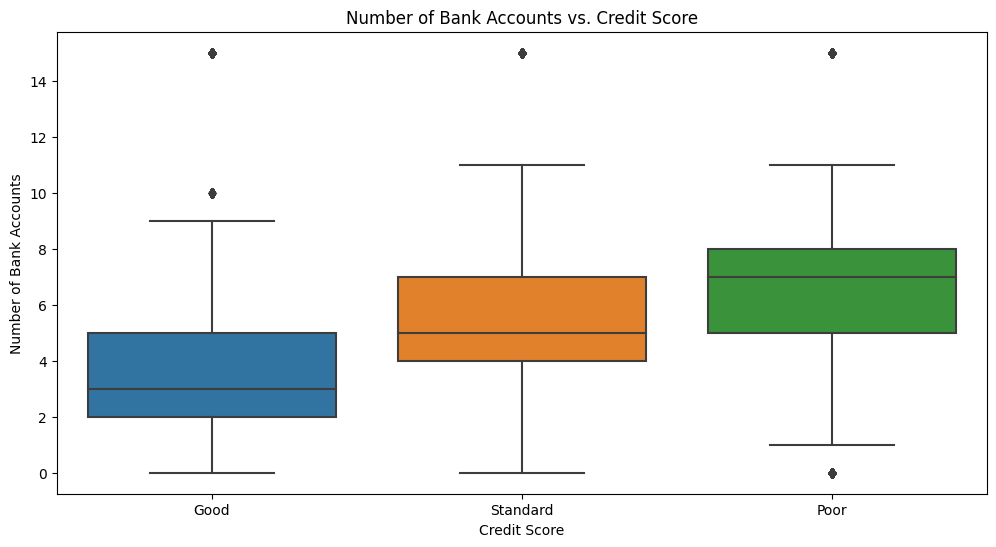

In [ ]:
# Visualizing the relationship between Number of Bank Accounts and Credit Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=data)
plt.title('Number of Bank Accounts vs. Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Bank Accounts')
plt.show()


## Age Distribution vs. Credit Score :

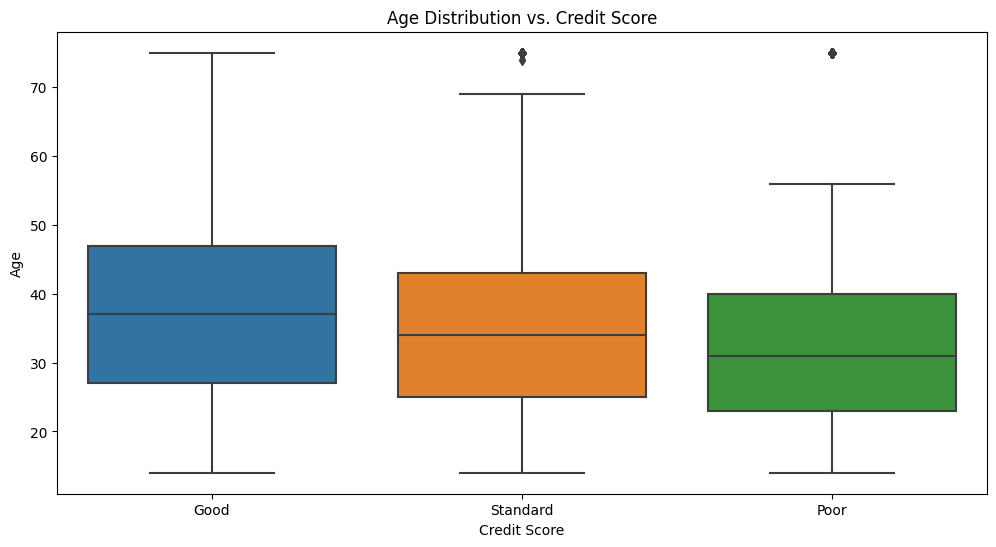

In [ ]:
# Visualizing the relationship between Age and Credit Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Age', data=data)
plt.title('Age Distribution vs. Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.show()

## Relationships between different loan types and credit scores :

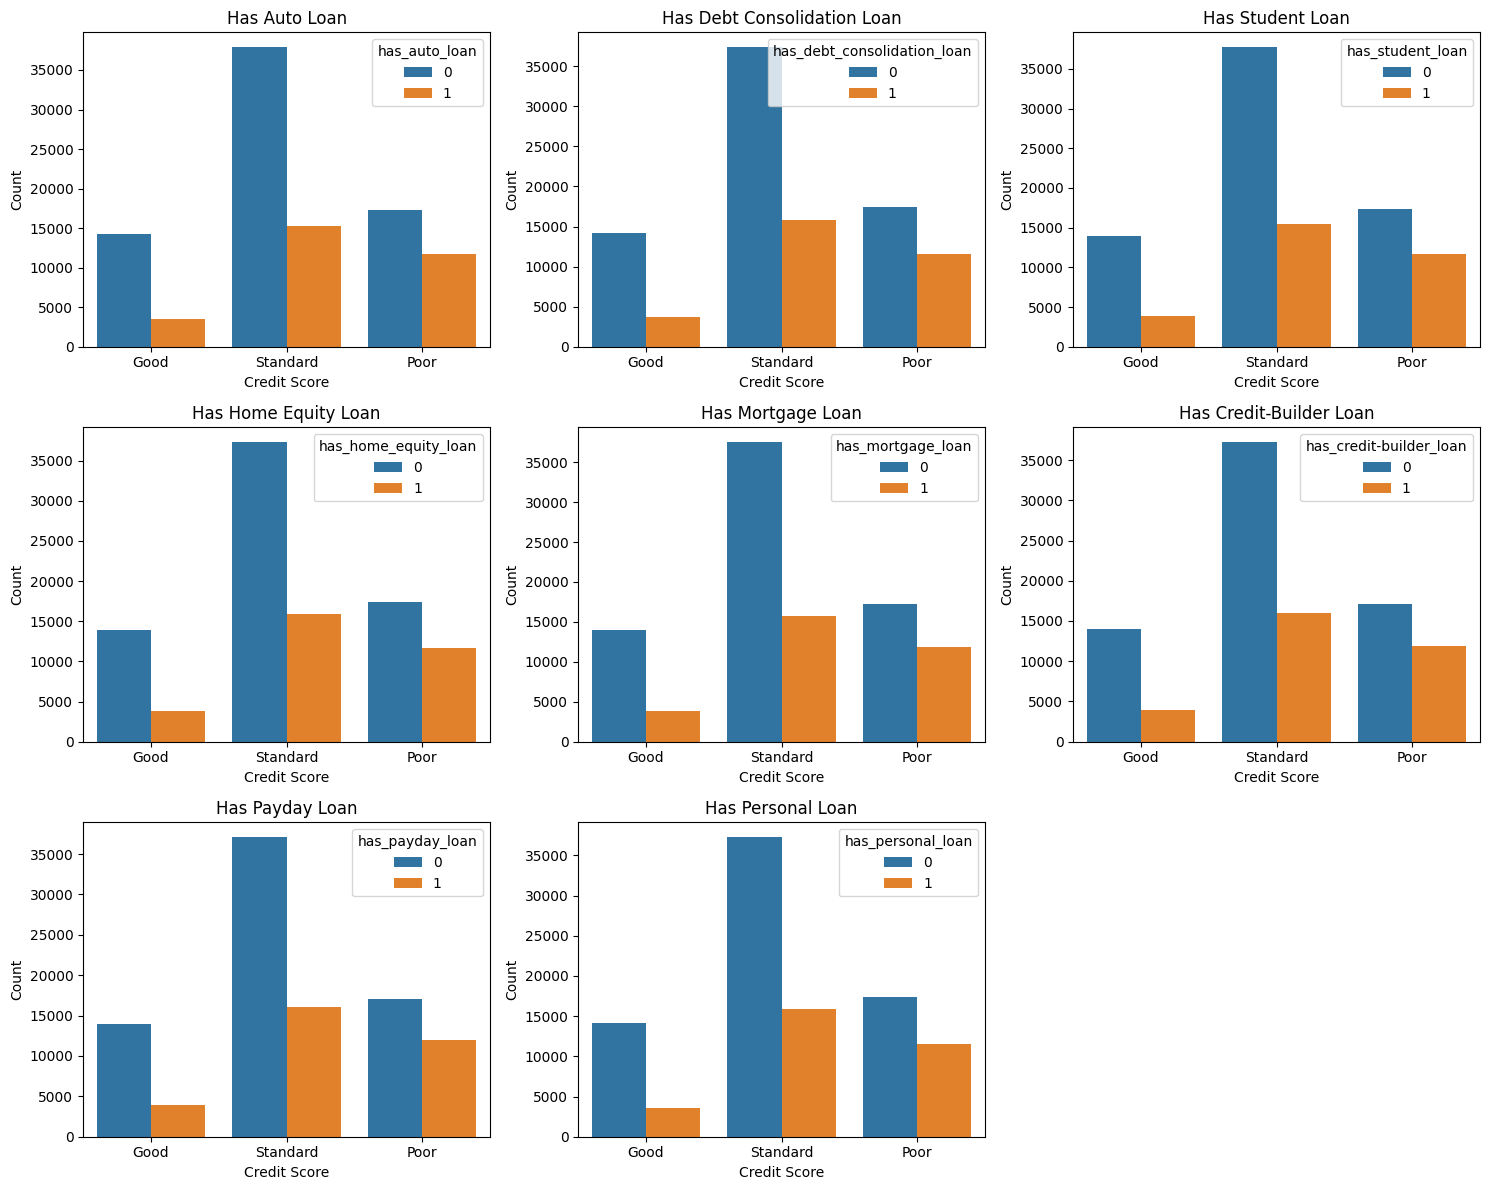

In [ ]:
loan_types = ['has_auto_loan', 'has_debt_consolidation_loan', 'has_student_loan',
              'has_home_equity_loan', 'has_mortgage_loan', 'has_credit-builder_loan',
              'has_payday_loan', 'has_personal_loan']

# Plotting relationships between different loan types and credit scores
plt.figure(figsize=(15, 12))

for i, loan_type in enumerate(loan_types, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x='Credit_Score', hue=loan_type, data=data)
    plt.title(loan_type.replace('_', ' ').title())
    plt.xlabel('Credit Score')
    plt.ylabel('Count')
    plt.legend(title=loan_type, loc='upper right')

plt.tight_layout()
plt.show()

## Correlation Matrix of Numerical Features :

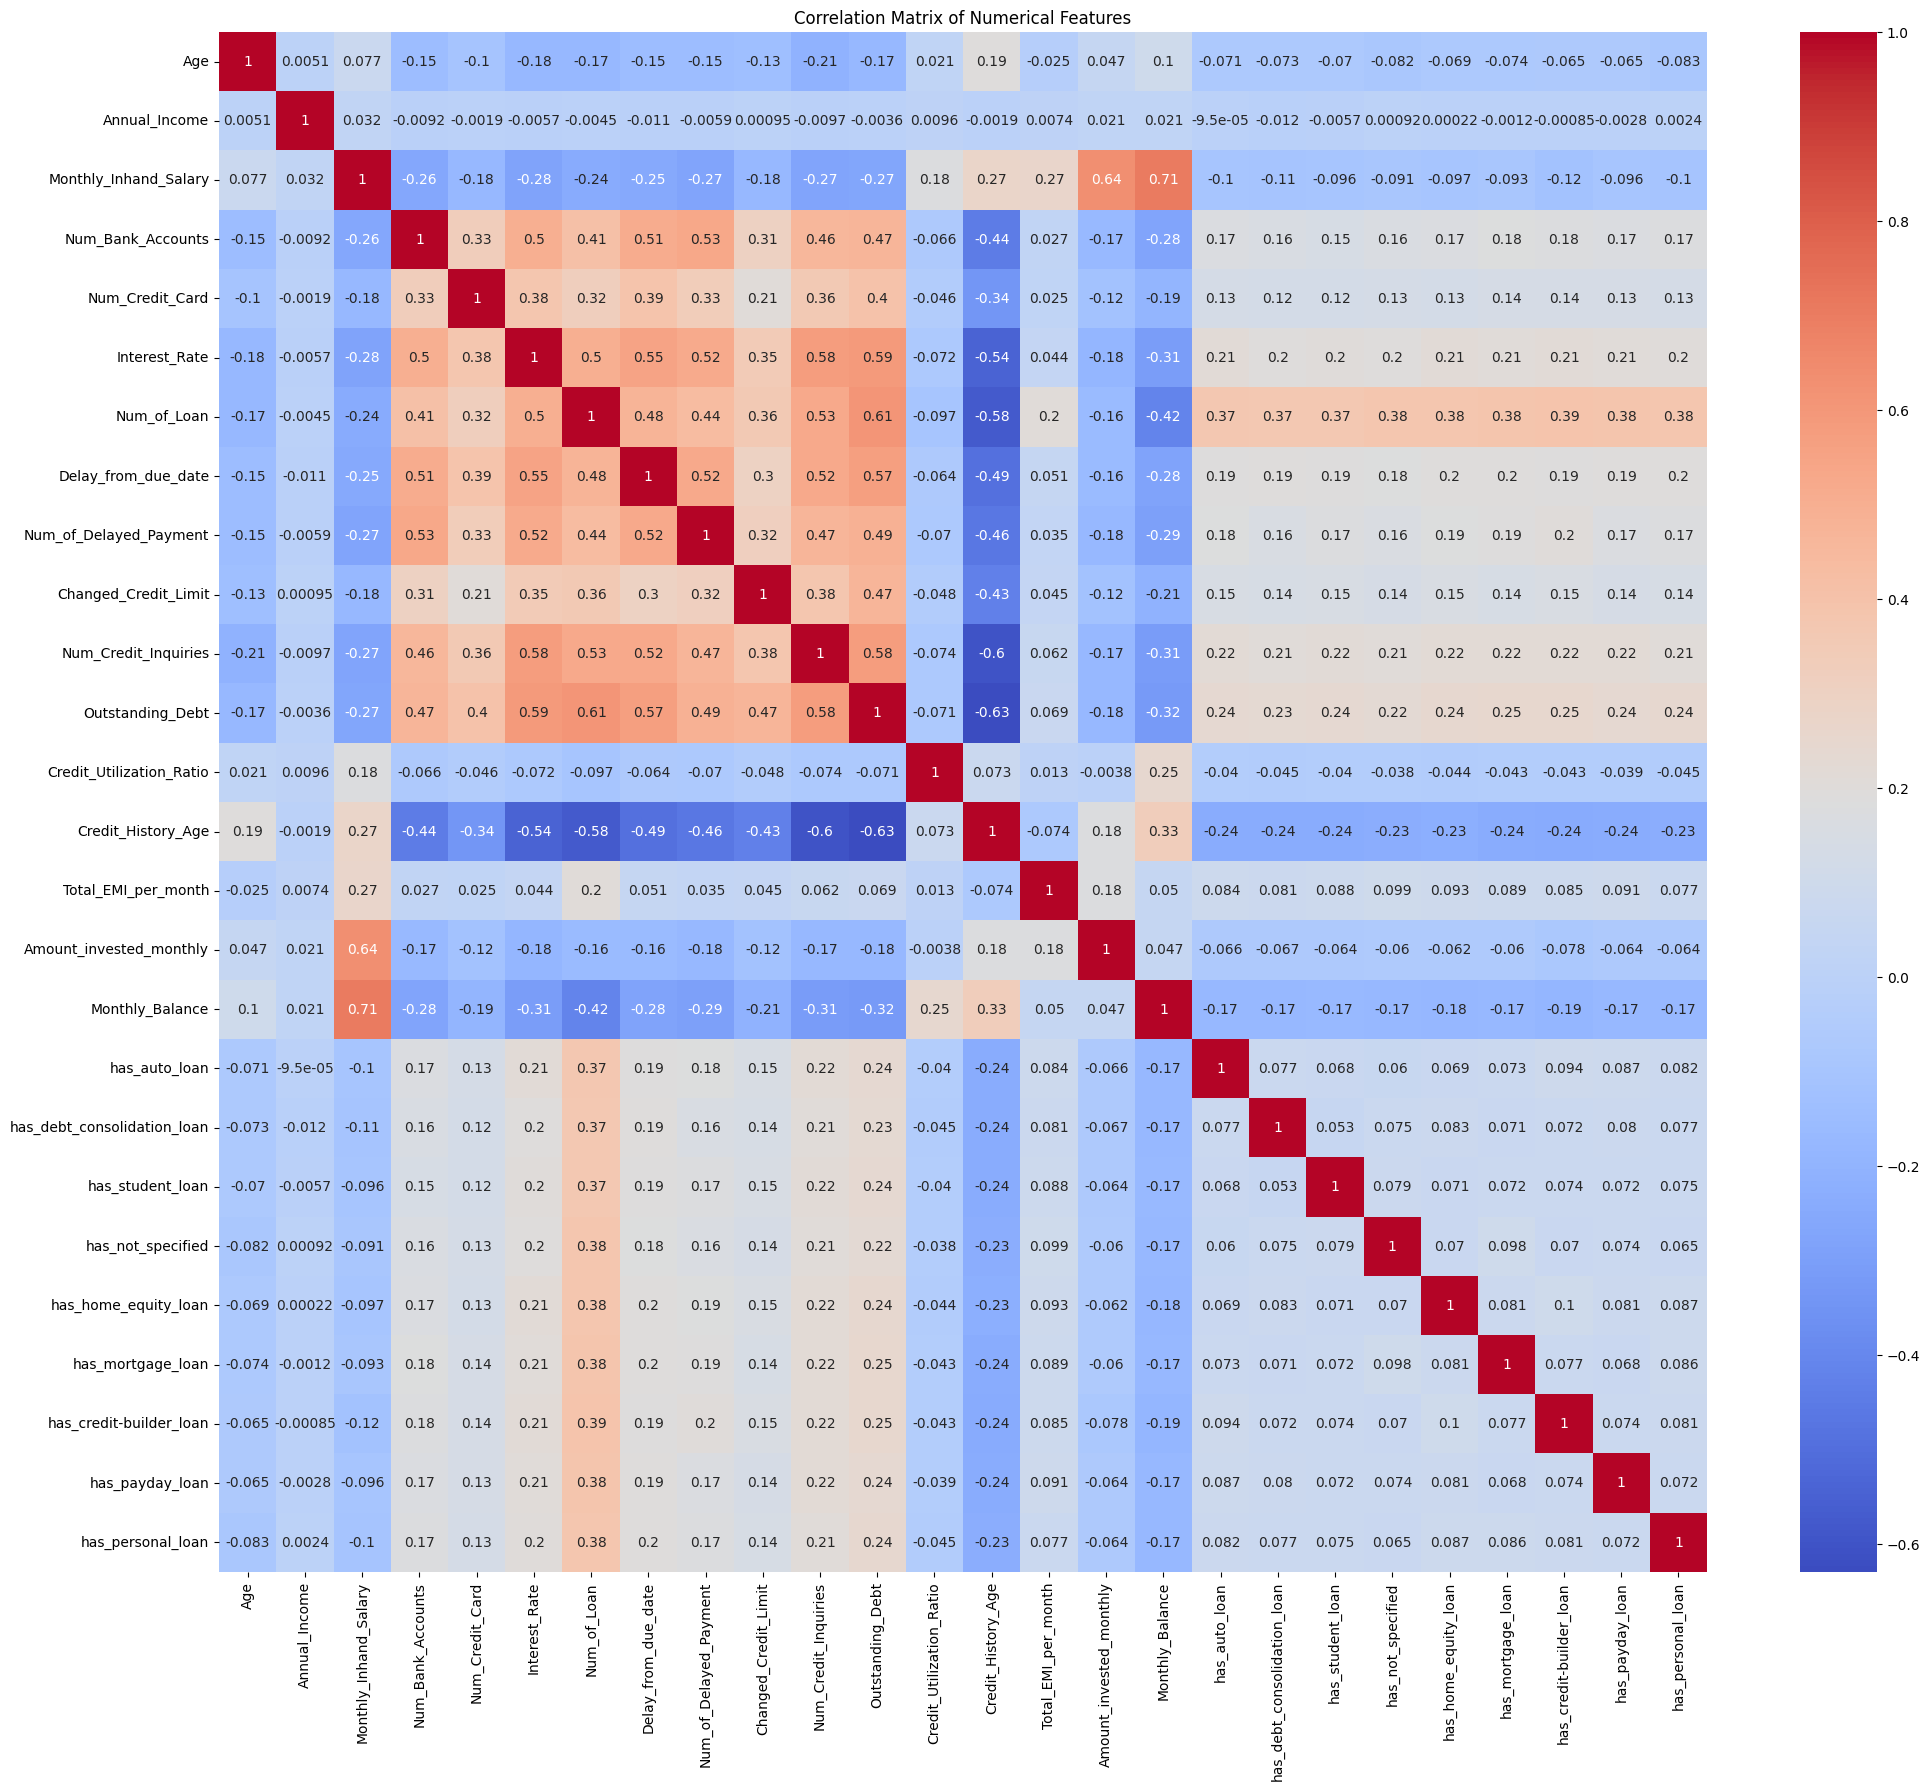

In [ ]:


# Exploring correlations with other numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculating correlations
correlation_matrix = data[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# **Save Data Files** :

In [ ]:
final_data.to_csv('/content/drive/MyDrive/Portfolio/Credit Score Classification (Classification)/Data/final_data.csv', index=False) #save this DF for modelling

In [ ]:
data_converted.to_csv('/content/drive/MyDrive/Portfolio/Credit Score Classification (Classification)/Data/data_converted.csv', index=False) # Save this DF for further EDA and plots